In [66]:
import os
import pandas as pd

In [67]:
from src.graf import graf

In [68]:
results = pd.read_json(os.path.join('data','ergast-results.json'))

In [69]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'code', 'forename',
       'surname', 'dob', 'nationality', 'driverUrl', 'year', 'round', 'date',
       'quali_date', 'quali_time', 'location', 'country', 'gp', 'status',
       'constructor', 'constructorNationality', 'constructorRef', 'name'],
      dtype='object')

In [70]:
def rank23(ser):
    series = ser.copy()
    first_non_zero_index = series[~series.isnull()].index[0]
    series = series[series.index >= first_non_zero_index]
    series = series.fillna(0)
    value23 = series[2023.0]
    larger = len(series[series > value23])
    smaller = len(series[series < value23])
    equal = len(series[series == value23]) - 1
    return f"""{larger} seasons larger than 2023, {smaller} seasons smaller than 2023, {equal} seasons equal to 2023"""

In [71]:
results['year'].nunique()

74

## From what grid places did the top 3 finishers start?

In [72]:
podiums = results[results['position'].isin([1,2,3])]

In [73]:
podiums.groupby('year')['grid'].mean().nsmallest(6)

year
2015.0    2.807018
2007.0    2.882353
2010.0    2.929825
2002.0    3.019608
1993.0    3.104167
2011.0    3.122807
Name: grid, dtype: float64

In [74]:
podiums.groupby('year')['grid'].mean().nlargest(6)

year
1956.0    7.620690
1968.0    6.472222
1960.0    6.258065
1982.0    6.145833
1957.0    5.880000
1983.0    5.795455
Name: grid, dtype: float64

<Axes: xlabel='year'>

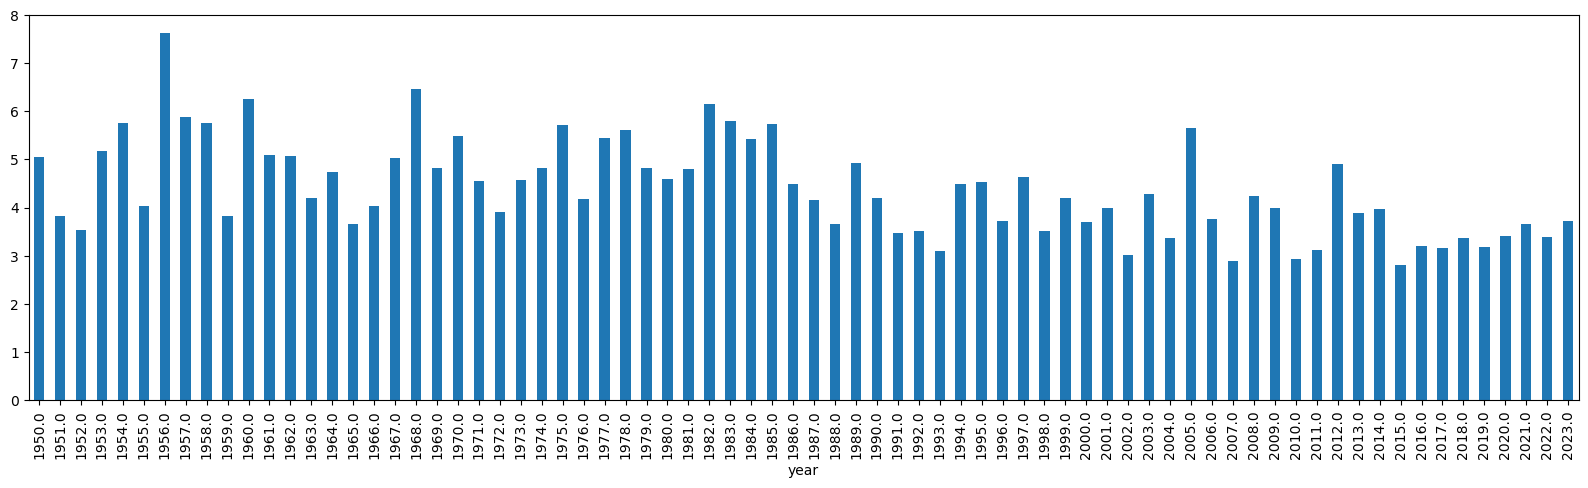

In [75]:
podiums.groupby('year')['grid'].mean().plot.bar(figsize=(20,5))

In [76]:
rank23(podiums.groupby('year')['grid'].mean())

'52 seasons larger than 2023, 21 seasons smaller than 2023, 0 seasons equal to 2023'

## Crashes (DNF-level) per race

In [77]:
crashes = ["Accident", "Collision", "Fatal accident", "Collision damage", "Spun off", "Front wing","Debris","Tyre puncture","Broken wing","Fire","Engine fire"]

In [78]:
results['status'].drop_duplicates().to_list()

['Finished',
 '+1 Lap',
 'Engine',
 'Collision',
 'Accident',
 'Transmission',
 'Clutch',
 'Electrical',
 'Hydraulics',
 'Disqualified',
 '+2 Laps',
 'Spun off',
 'Gearbox',
 'Radiator',
 'Suspension',
 '+4 Laps',
 'Brakes',
 '+3 Laps',
 'Overheating',
 'Tyre',
 'Puncture',
 'Driveshaft',
 'Fuel pressure',
 'Retired',
 'Wheel',
 'Throttle',
 'Steering',
 'Differential',
 'Oil pressure',
 'Withdrew',
 'Oil leak',
 'Injured',
 'Out of fuel',
 '+5 Laps',
 'Fuel pump',
 'Exhaust',
 '+6 Laps',
 '+9 Laps',
 'Rear wing',
 'Water leak',
 'Did not qualify',
 'Wheel nut',
 'Heat shield fire',
 'Vibrations',
 'Alternator',
 'Collision damage',
 'Fuel system',
 'Pneumatics',
 'ERS',
 '+8 Laps',
 'Power Unit',
 'Turbo',
 'Power loss',
 'Battery',
 'Water pump',
 'Fuel leak',
 'Wheel rim',
 '+7 Laps',
 'Not classified',
 'Handling',
 'Ignition',
 'Stalled',
 'Wheel bearing',
 'Did not prequalify',
 'Injection',
 'Distributor',
 'Technical',
 'Mechanical',
 'Front wing',
 'Electronics',
 'Engine misf

<Axes: xlabel='year'>

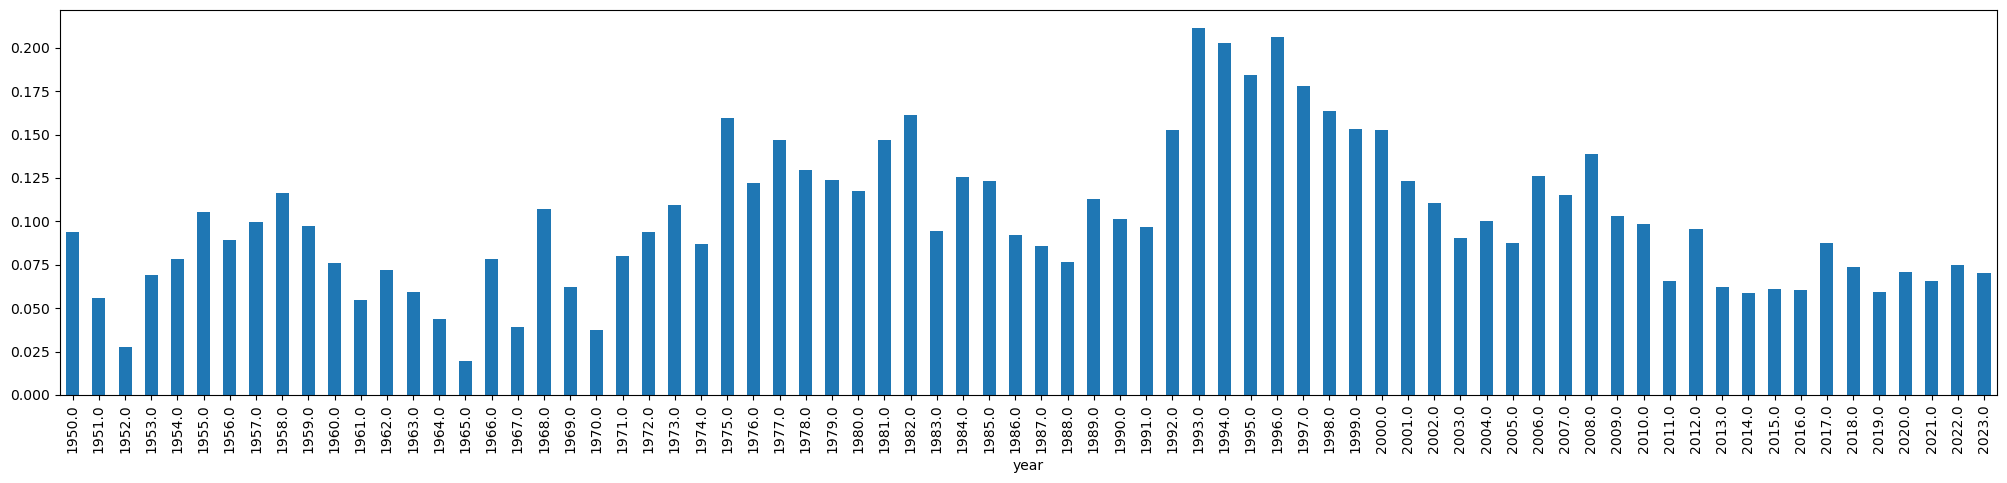

In [79]:
(results[results['status'].isin(crashes)].groupby('year')['resultId'].nunique() / results.groupby('year')['resultId'].nunique()).plot.bar(figsize=(25,5))

In [80]:
graf2 = pd.Series(results[results['status'].isin(crashes)].groupby('year')['resultId'].nunique() / results.groupby('year')['resultId'].nunique(), name="Podíl odstoupení ze závodu kvůli nehodě nebo požáru")
graf2.index = graf2.index.astype(int)

In [81]:
graf2.nlargest()

year
1993    0.211165
1996    0.205882
1994    0.202703
1995    0.184211
1997    0.178191
Name: Podíl odstoupení ze závodu kvůli nehodě nebo požáru, dtype: float64

In [82]:
graf(sloupcovy=[graf2], titulek="Devadesátá léta nakrmila vrakoviště", prvni=True, kredity=["Zdroj dat: Ergast F1 API | Vizualizace: Michal Kašpárek, iROZHLAS.cz","https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika"], target="nehody", procenta=[graf2], max_procenta=25, barvy=["#fd7f6f"])

Graf uložen.


In [83]:
rank23((results[results['status'].isin(crashes)].groupby('year')['resultId'].nunique() / results.groupby('year')['resultId'].nunique()))

'56 seasons larger than 2023, 17 seasons smaller than 2023, 0 seasons equal to 2023'

## From hero to zero

In [84]:
laps = pd.read_csv(os.path.join('data_raw','lap_times.csv'))

In [85]:
laps = laps.merge(results[results['year'] >= 1996][['raceId','driverId','grid','laps','year','round','gp','name','constructor','status']], on=['raceId','driverId'], how='outer')

In [86]:
total_laps = pd.Series(laps.groupby('raceId')['lap'].max(), name="totalLaps")

In [87]:
laps = laps.merge(total_laps, on='raceId')

In [88]:
laps

,raceId,driverId,lap,position,time,milliseconds,grid,laps,year,round,gp,name,constructor,status,totalLaps
0,841.0,20.0,1.0,1.0,1:38.109,98109.0,1.0,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished,58.0
1,841.0,20.0,2.0,1.0,1:33.006,93006.0,1.0,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished,58.0
2,841.0,20.0,3.0,1.0,1:32.713,92713.0,1.0,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished,58.0
3,841.0,20.0,4.0,1.0,1:32.803,92803.0,1.0,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished,58.0
4,841.0,20.0,5.0,1.0,1:32.342,92342.0,1.0,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562943,1120.0,858.0,54.0,18.0,1:28.923,88923.0,20.0,58.0,2023.0,22.0,Abu Dhabi Grand Prix,Logan Sargeant,Williams,Finished,58.0
562944,1120.0,858.0,55.0,18.0,1:29.025,89025.0,20.0,58.0,2023.0,22.0,Abu Dhabi Grand Prix,Logan Sargeant,Williams,Finished,58.0
562945,1120.0,858.0,56.0,18.0,1:29.430,89430.0,20.0,58.0,2023.0,22.0,Abu Dhabi Grand Prix,Logan Sargeant,Williams,Finished,58.0
562946,1120.0,858.0,57.0,17.0,1:29.265,89265.0,20.0,58.0,2023.0,22.0,Abu Dhabi Grand Prix,Logan Sargeant,Williams,Finished,58.0


In [89]:
fromherotozero = laps[(((laps['lap'] == laps['laps']) | (laps['lap'] == laps['laps'] -1 )  | (laps['lap'] == laps['laps'] -2 )) & (laps['position'] == 1) & (laps['laps'] < laps['totalLaps']) | ((laps['laps'] == 0) & (laps['grid'] == 1)))].drop(columns=['lap','time','milliseconds']).drop_duplicates()
fromherotozero = fromherotozero[fromherotozero['status'] != 'Finished']

In [90]:
fromherotozero['lapsUntilFinish'] = fromherotozero['totalLaps'] - fromherotozero['laps']

In [91]:
fromherotozero.groupby(['name','year'])['raceId'].nunique().nlargest(10)

name                year  
Charles Leclerc     2022.0    3
Juan Pablo Montoya  2001.0    3
Kimi Räikkönen      2005.0    3
Lewis Hamilton      2012.0    3
Mika Häkkinen       1999.0    3
Damon Hill          1996.0    2
David Coulthard     1998.0    2
                    1999.0    2
Juan Pablo Montoya  2003.0    2
Lewis Hamilton      2016.0    2
Name: raceId, dtype: int64

In [92]:
fromherotozero.sort_values(by=["year",'round'])[['year','gp','name','lapsUntilFinish','status']].tail(10)

,year,gp,name,lapsUntilFinish,status
430209,2018.0,Azerbaijan Grand Prix,Valtteri Bottas,3.0,Puncture
437723,2018.0,German Grand Prix,Sebastian Vettel,16.0,Accident
466182,2019.0,Russian Grand Prix,Sebastian Vettel,27.0,Power loss
497371,2021.0,Monaco Grand Prix,Charles Leclerc,78.0,Driveshaft
497516,2021.0,Azerbaijan Grand Prix,Max Verstappen,6.0,Accident
502966,2021.0,British Grand Prix,Max Verstappen,52.0,Collision
505487,2021.0,Italian Grand Prix,Lewis Hamilton,28.0,Collision
520206,2022.0,Spanish Grand Prix,Charles Leclerc,39.0,Turbo
522657,2022.0,Azerbaijan Grand Prix,Charles Leclerc,30.0,Power Unit
526890,2022.0,French Grand Prix,Charles Leclerc,36.0,Accident


In [93]:
(fromherotozero.groupby('year')['raceId'].nunique() / results[results['year'] >= 1996].groupby('year')['raceId'].nunique())

year
1996.0    0.250000
1997.0    0.294118
1998.0    0.187500
1999.0    0.375000
2000.0    0.235294
2001.0    0.235294
2002.0    0.176471
2003.0    0.312500
2004.0    0.166667
2005.0    0.315789
2006.0    0.166667
2007.0    0.058824
2008.0    0.166667
2009.0         NaN
2010.0    0.105263
2011.0    0.052632
2012.0    0.200000
2013.0    0.052632
2014.0    0.105263
2015.0    0.052632
2016.0    0.142857
2017.0    0.050000
2018.0    0.095238
2019.0    0.047619
2020.0         NaN
2021.0    0.181818
2022.0    0.136364
2023.0         NaN
Name: raceId, dtype: float64

<Axes: xlabel='year'>

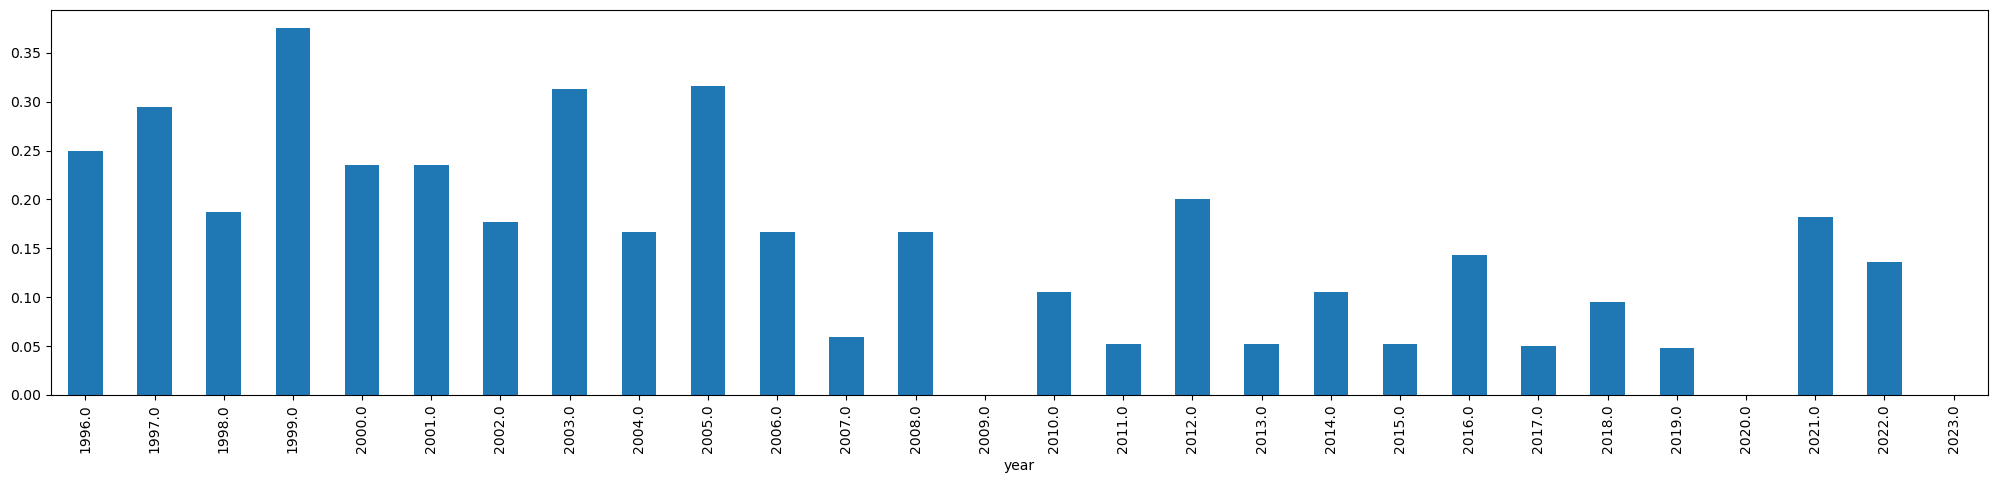

In [94]:
(fromherotozero.groupby('year')['raceId'].nunique() / results[results['year'] >= 1996].groupby('year')['raceId'].nunique()).plot.bar(figsize=(25,5))

In [95]:
rank23((fromherotozero.groupby('year')['raceId'].nunique() / results[results['year'] >= 1996].groupby('year')['raceId'].nunique()))

'25 seasons larger than 2023, 0 seasons smaller than 2023, 2 seasons equal to 2023'

## Percentage of laps in the lead

In [96]:
laps['lapid'] = laps.index

In [97]:
laps[laps['position'] == 1].groupby('year')['name'].nunique().nlargest()

year
2008.0    15
2003.0    13
2009.0    13
2012.0    13
2013.0    13
Name: name, dtype: int64

In [98]:
laps[laps['position'] == 1].groupby('year')['name'].nunique().nsmallest()

year
2000.0    5
1998.0    6
2002.0    6
2016.0    6
2017.0    6
Name: name, dtype: int64

In [99]:
lapsLed = pd.DataFrame(laps[laps['position'] == 1].groupby(['year','name']).size() / laps[laps['position'] == 1].groupby(['year'])['lapid'].nunique()).reset_index().rename(columns={0:"lapsLed"})

In [100]:
lapsLed

,year,name,lapsLed
0,1996.0,Damon Hill,0.473373
1,1996.0,David Coulthard,0.025641
2,1996.0,Gerhard Berger,0.030572
3,1996.0,Jacques Villeneuve,0.281065
4,1996.0,Jean Alesi,0.059172
...,...,...,...
256,2023.0,Lewis Hamilton,0.009811
257,2023.0,Max Verstappen,0.756981
258,2023.0,Oscar Piastri,0.000755
259,2023.0,Sergio Pérez,0.110189


In [101]:
titles = pd.read_csv(os.path.join("data_raw","titles.csv"))
titles['year'] = titles['date'].apply(lambda x: int(x[0:4]))

In [102]:
lapsLed = lapsLed.merge(titles[titles['year'] >= 1996][['year','champion']], left_on = ['name','year'], right_on = ['champion','year'], how='outer')

In [103]:
lapsLed[~lapsLed['champion'].isnull()].sort_values(by="lapsLed",ascending=False).head(10)

,year,name,lapsLed,champion
257,2023.0,Max Verstappen,0.756981,Max Verstappen
155,2011.0,Sebastian Vettel,0.652251,Sebastian Vettel
74,2004.0,Michael Schumacher,0.608734,Michael Schumacher
181,2013.0,Sebastian Vettel,0.604775,Sebastian Vettel
227,2020.0,Lewis Hamilton,0.591128,Lewis Hamilton
24,1998.0,Mika Häkkinen,0.567488,Mika Häkkinen
51,2002.0,Michael Schumacher,0.511927,Michael Schumacher
195,2015.0,Lewis Hamilton,0.510879,Lewis Hamilton
38,2000.0,Michael Schumacher,0.510242,Michael Schumacher
239,2021.0,Max Verstappen,0.502699,Max Verstappen


In [104]:
lapsLed[~lapsLed['champion'].isnull()].sort_values(by="lapsLed",ascending=True).head(10)

,year,name,lapsLed,champion
105,2007.0,Kimi Räikkönen,0.199061,Kimi Räikkönen
118,2008.0,Lewis Hamilton,0.262310,Lewis Hamilton
132,2009.0,Jenson Button,0.283401,Jenson Button
79,2005.0,Fernando Alonso,0.284746,Fernando Alonso
64,2003.0,Michael Schumacher,0.297642,Michael Schumacher
167,2012.0,Sebastian Vettel,0.308725,Sebastian Vettel
14,1997.0,Jacques Villeneuve,0.330171,Jacques Villeneuve
146,2010.0,Sebastian Vettel,0.338353,Sebastian Vettel
213,2018.0,Lewis Hamilton,0.362342,Lewis Hamilton
32,1999.0,Mika Häkkinen,0.383000,Mika Häkkinen


In [105]:
from src.tabulka import tabulka

In [106]:
tabulka1 = lapsLed[~lapsLed['champion'].isnull()].sort_values(by="lapsLed",ascending=True).head(10).drop(columns=['champion']).rename(columns={"year":"Rok","name":"Mistr světa","lapsLed": "Kol ve vedení"})
tabulka1 

,Rok,Mistr světa,Kol ve vedení
105,2007.0,Kimi Räikkönen,0.199061
118,2008.0,Lewis Hamilton,0.262310
132,2009.0,Jenson Button,0.283401
79,2005.0,Fernando Alonso,0.284746
64,2003.0,Michael Schumacher,0.297642
167,2012.0,Sebastian Vettel,0.308725
14,1997.0,Jacques Villeneuve,0.330171
146,2010.0,Sebastian Vettel,0.338353
213,2018.0,Lewis Hamilton,0.362342
32,1999.0,Mika Häkkinen,0.383000


In [107]:
tabulka(tabulka1, titulek="Mistrovská efektivita: šampioni, kteří vedli nejméně kol", podtitulek="Srovnání vychází z dat od roku 1996.", na_procenta=["Kol ve vedení"], bez_tecky=["Rok"])

'<table class="dataframe table table--responsive table--w100p table--striped-red table--plain"><caption>Mistrovská efektivita: šampioni, kteří vedli nejméně kol</caption><thead><tr style="text-align: right;"><th class="text-nowrap">Rok</th><th class="text-nowrap">Mistr světa</th><th class="text-nowrap">Kol ve vedení</th></tr></thead><tbody class="text-sm"><tr><td>2007</td><td>Kimi Räikkönen</td><td>19,9 %</td></tr><tr><td>2008</td><td>Lewis Hamilton</td><td>26,2 %</td></tr><tr><td>2009</td><td>Jenson Button</td><td>28,3 %</td></tr><tr><td>2005</td><td>Fernando Alonso</td><td>28,5 %</td></tr><tr><td>2003</td><td>Michael Schumacher</td><td>29,8 %</td></tr><tr><td>2012</td><td>Sebastian Vettel</td><td>30,9 %</td></tr><tr><td>1997</td><td>Jacques Villeneuve</td><td>33,0 %</td></tr><tr><td>2010</td><td>Sebastian Vettel</td><td>33,8 %</td></tr><tr><td>2018</td><td>Lewis Hamilton</td><td>36,2 %</td></tr><tr><td>1999</td><td>Mika Häkkinen</td><td>38,3 %</td></tr></tbody><tfoot><tr style="text-

In [108]:
lapsLed[lapsLed['champion'].isnull()].sort_values(by="lapsLed",ascending=False).head(10)

,year,name,lapsLed,champion
201,2016.0,Lewis Hamilton,0.446372,NaN
188,2014.0,Nico Rosberg,0.425176,NaN
39,2000.0,Mika Häkkinen,0.327747,NaN
113,2008.0,Felipe Massa,0.325873,NaN
97,2006.0,Michael Schumacher,0.321900,NaN
84,2005.0,Kimi Räikkönen,0.317797,NaN
196,2015.0,Nico Rosberg,0.303742,NaN
106,2007.0,Lewis Hamilton,0.301408,NaN
17,1997.0,Michael Schumacher,0.284630,NaN
101,2007.0,Felipe Massa,0.281690,NaN


<Axes: xlabel='year,name'>

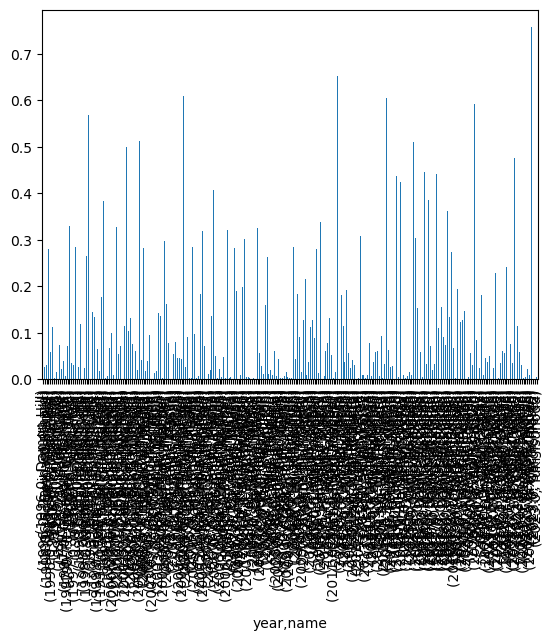

In [109]:
(laps[laps['position'] == 1].groupby(['year','name']).size() / laps[laps['position'] == 1].groupby(['year'])['lapid'].nunique()).plot.bar()

## Leading driver changes

In [110]:
raceids = results['raceId'].drop_duplicates().to_list()

In [111]:
def get_leader_changes(id):
    wdf = laps[laps['raceId'] == id]
    if len(wdf) == 0:
        return None
    else:
        wdf = wdf[wdf['position'] == 1].sort_values(by='lap')
        leaders = wdf['name'].to_list()
        dummy_leader = None
        count = -1
        for l in leaders:
            if l == dummy_leader:
                pass
            else:
                dummy_leader = l
                count = count + 1
        return count

In [112]:
leaderChanges = {}
for r in raceids:
    leaderChanges[r] = get_leader_changes(r)
leaderChanges = pd.DataFrame.from_dict([leaderChanges]).transpose()
leaderChanges['raceId'] = leaderChanges.index
leaderChanges = leaderChanges.rename(columns={0 : 'leaderChanges'})

In [113]:
leaderChanges

,leaderChanges,raceId
18.0,4,18.0
19.0,5,19.0
20.0,3,20.0
21.0,3,21.0
22.0,7,22.0
...,...,...
778.0,None,778.0
809.0,None,809.0
794.0,None,794.0
800.0,None,800.0


In [114]:
results = results.merge(leaderChanges, on='raceId')

In [115]:
results['leaderChanges'] = pd.to_numeric(results['leaderChanges'])

In [116]:
results.groupby(['year','gp'])['leaderChanges'].mean().nlargest(20)

year    gp                   
2008.0  Japanese Grand Prix      10.0
2011.0  Japanese Grand Prix      10.0
2013.0  Australian Grand Prix    10.0
2002.0  French Grand Prix         9.0
2005.0  Japanese Grand Prix       9.0
2011.0  Belgian Grand Prix        9.0
        German Grand Prix         9.0
        Hungarian Grand Prix      9.0
2013.0  Chinese Grand Prix        9.0
        Malaysian Grand Prix      9.0
2022.0  British Grand Prix        9.0
2003.0  Monaco Grand Prix         8.0
2004.0  Belgian Grand Prix        8.0
        Brazilian Grand Prix      8.0
        German Grand Prix         8.0
2005.0  European Grand Prix       8.0
2008.0  German Grand Prix         8.0
2011.0  Brazilian Grand Prix      8.0
        Chinese Grand Prix        8.0
        Spanish Grand Prix        8.0
Name: leaderChanges, dtype: float64

In [117]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'code', 'forename',
       'surname', 'dob', 'nationality', 'driverUrl', 'year', 'round', 'date',
       'quali_date', 'quali_time', 'location', 'country', 'gp', 'status',
       'constructor', 'constructorNationality', 'constructorRef', 'name',
       'leaderChanges'],
      dtype='object')

In [118]:
threetimers = results[results['year'] >= 1996].groupby('location')['raceId'].nunique()
threetimers = threetimers[threetimers >= 3]
threetimers = threetimers.index.to_list()

In [119]:
results[results['location'].isin(threetimers)].groupby(['location'])['leaderChanges'].mean().dropna().sort_values(ascending=False)

location
Kuala Lumpur      4.150485
Indianapolis      3.988095
Nürburg           3.950437
Austin            3.902655
São Paulo         3.741259
Magny Cours       3.597122
Sakhir            3.528571
Montmeló          3.519328
Budapest          3.463621
Istanbul          3.447917
Shanghai          3.315789
Montreal          3.108209
Suzuka            3.043137
Jeddah            3.000000
Zandvoort         3.000000
Melbourne         2.956989
Spielberg         2.813131
Monza             2.773649
Hockenheim        2.773438
Silverstone       2.700813
Spa               2.556364
Baku              2.535211
Valencia          2.428571
Abu Dhabi         2.405063
Mexico City       2.382716
Imola             2.202703
Le Castellet      2.000000
Monte-Carlo       1.672474
Buenos Aires      1.666667
Marina Bay        1.637584
Sochi             1.595092
Uttar Pradesh     1.571429
Yeongam County    0.765957
Name: leaderChanges, dtype: float64

In [120]:
results[results['year'] >= 1996].groupby('year')['leaderChanges'].mean().tail()

year
2019.0    2.333333
2020.0    1.823529
2021.0    2.590909
2022.0    3.454545
2023.0    2.090909
Name: leaderChanges, dtype: float64

<Axes: xlabel='year'>

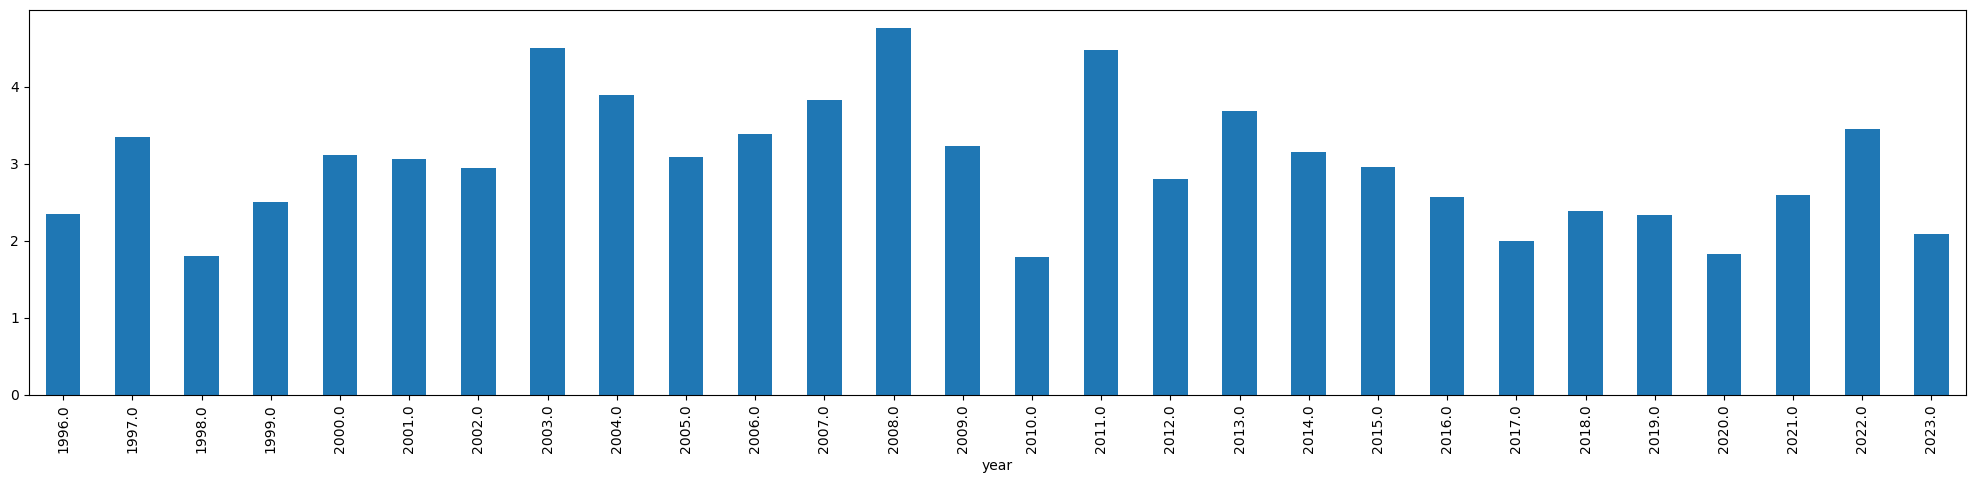

In [121]:
results[results['year'] >= 1996].groupby('year')['leaderChanges'].mean().plot.bar(figsize=(25,5))

In [122]:
rank23(results[results['year'] >= 1996].groupby('year')['leaderChanges'].mean())

'23 seasons larger than 2023, 4 seasons smaller than 2023, 0 seasons equal to 2023'

<Axes: xlabel='year'>

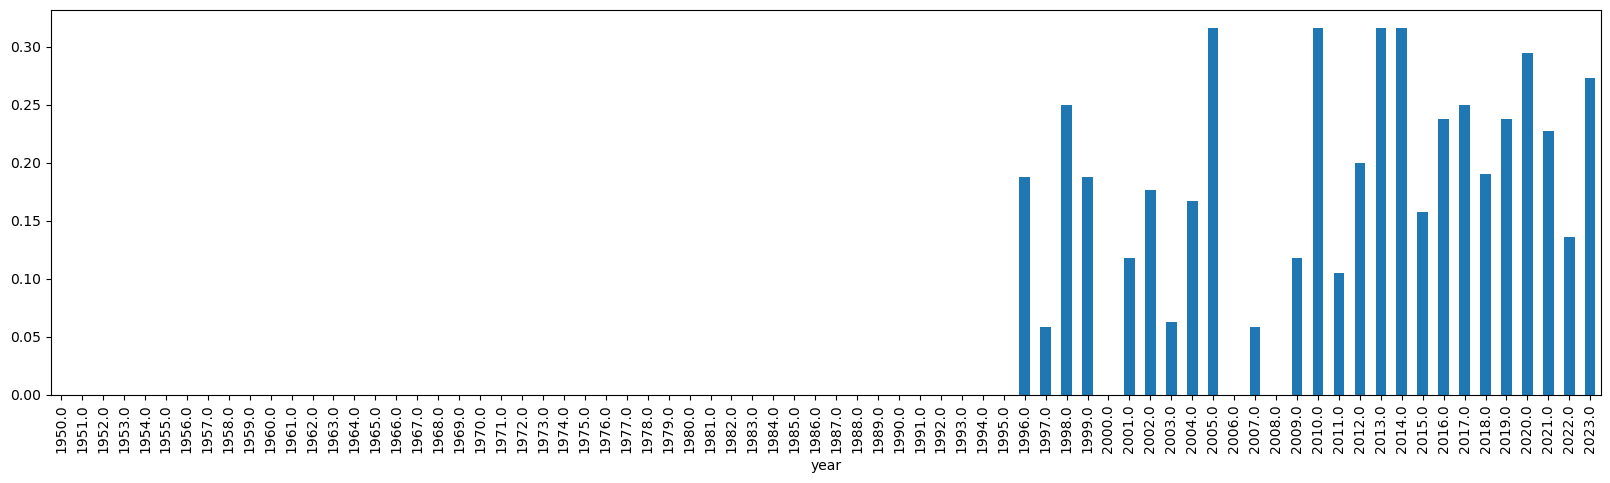

In [123]:
(results[results['leaderChanges'] == 0].groupby('year')['raceId'].nunique() / results.groupby('year')['raceId'].nunique()).plot.bar(figsize=(20,5))

In [124]:
rank23(results[results['leaderChanges'] == 0].groupby('year')['raceId'].nunique() / results.groupby('year')['raceId'].nunique())

'5 seasons larger than 2023, 22 seasons smaller than 2023, 0 seasons equal to 2023'

<Axes: xlabel='year'>

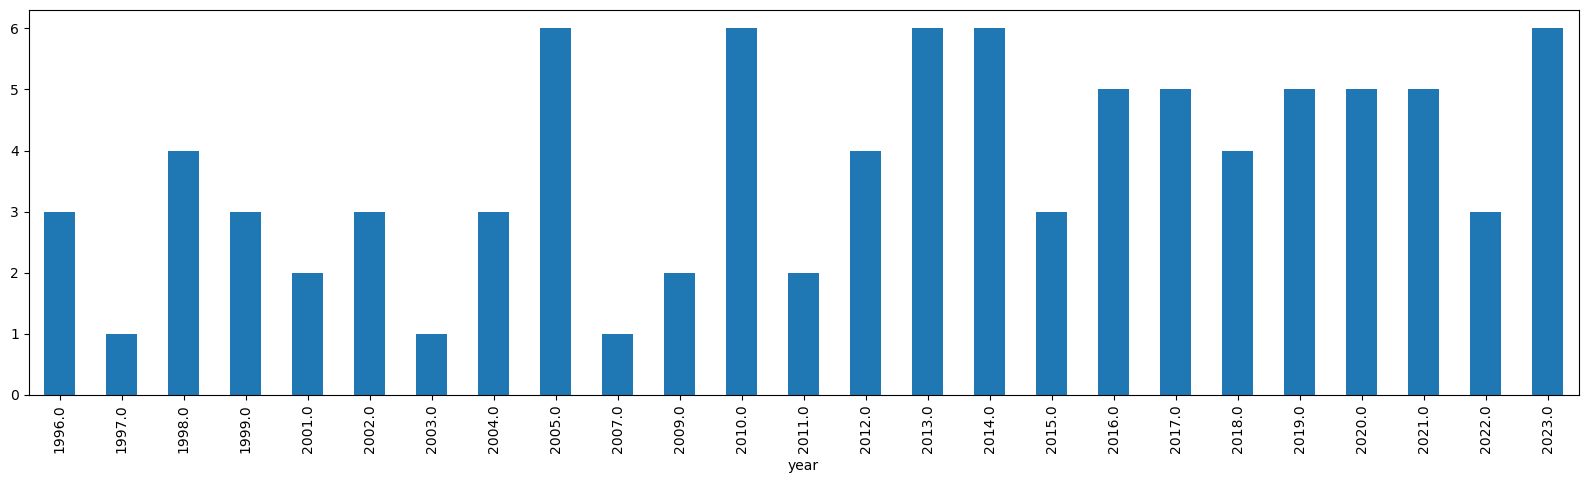

In [125]:
results[(results['leaderChanges'] == 0) & (results['position'] == 1)].groupby('year')['raceId'].nunique().plot.bar(figsize=(20,5))

In [126]:
rank23(results[(results['leaderChanges'] == 0) & (results['position'] == 1)].groupby('year')['raceId'].nunique())

'0 seasons larger than 2023, 20 seasons smaller than 2023, 4 seasons equal to 2023'

## The gap between the deciding race and the end of the season

In [127]:
sprints = pd.read_json(os.path.join('data','ergast-sprints.json'))
results_w_sprints = pd.concat([results, sprints])

In [128]:
sprints['raceId'].drop_duplicates().sort_values().tail()

1079    1117.0
22      1118.0
1328    1119.0
798     1120.0
1329       NaN
Name: raceId, dtype: float64

In [129]:
titles

,date,champion,year
0,1950-09-03,Nino Farina,1950
1,1951-10-28,Juan Fangio,1951
2,1952-08-03,Alberto Ascari,1952
3,1953-08-23,Alberto Ascari,1953
4,1954-08-22,Juan Fangio,1954
...,...,...,...
69,2019-11-03,Lewis Hamilton,2019
70,2020-11-15,Lewis Hamilton,2020
71,2021-12-12,Max Verstappen,2021
72,2022-10-09,Max Verstappen,2022


In [130]:
races_raw = pd.read_csv(os.path.join('data_raw','races.csv'))

In [131]:
races_raw = races_raw[['year','date']]

In [132]:
seasonEnds = pd.DataFrame(races_raw.groupby('year')['date'].max())

In [133]:
seasonEnds['year'] = seasonEnds.index

In [134]:
seasonEnds['year'] = seasonEnds['year'].astype(int)
seasonEnds = seasonEnds.reset_index(drop=True)

In [135]:
seasonEnds

,date,year
0,1950-09-03,1950
1,1951-10-28,1951
2,1952-09-07,1952
3,1953-09-13,1953
4,1954-10-24,1954
...,...,...
69,2019-12-01,2019
70,2020-12-13,2020
71,2021-12-12,2021
72,2022-11-20,2022


In [136]:
titles['decidingDate'] = titles['date']
titles = titles.drop(columns = ['date'])

In [137]:
titles = titles.merge(seasonEnds, on='year')

In [138]:
titles = titles.rename(columns = {'date': 'lastDate'})

In [139]:
titles['decidingDate'] = pd.to_datetime(titles['decidingDate'])

In [140]:
titles['lastDate'] = pd.to_datetime(titles['lastDate'])

In [141]:
titles

,champion,year,decidingDate,lastDate
0,Nino Farina,1950,1950-09-03,1950-09-03
1,Juan Fangio,1951,1951-10-28,1951-10-28
2,Alberto Ascari,1952,1952-08-03,1952-09-07
3,Alberto Ascari,1953,1953-08-23,1953-09-13
4,Juan Fangio,1954,1954-08-22,1954-10-24
...,...,...,...,...
69,Lewis Hamilton,2019,2019-11-03,2019-12-01
70,Lewis Hamilton,2020,2020-11-15,2020-12-13
71,Max Verstappen,2021,2021-12-12,2021-12-12
72,Max Verstappen,2022,2022-10-09,2022-11-20


In [142]:
titles['gap'] = titles['lastDate'] - titles['decidingDate']

In [143]:
titles['gap']

0     0 days
1     0 days
2    35 days
3    21 days
4    63 days
       ...  
69   28 days
70   28 days
71    0 days
72   42 days
73   50 days
Name: gap, Length: 74, dtype: timedelta64[ns]

In [144]:
titles.sort_values(by=['gap','year']).head(35)

,champion,year,decidingDate,lastDate,gap
0,Nino Farina,1950,1950-09-03,1950-09-03,0 days
1,Juan Fangio,1951,1951-10-28,1951-10-28,0 days
6,Juan Fangio,1956,1956-09-02,1956-09-02,0 days
8,Mike Hawthorn,1958,1958-10-19,1958-10-19,0 days
9,Jack Brabham,1959,1959-12-12,1959-12-12,0 days
12,Graham Hill,1962,1962-12-29,1962-12-29,0 days
14,John Surtees,1964,1964-10-25,1964-10-25,0 days
17,Denny Hulme,1967,1967-10-22,1967-10-22,0 days
18,Graham Hill,1968,1968-11-03,1968-11-03,0 days
24,Emerson Fittipaldi,1974,1974-10-06,1974-10-06,0 days


In [145]:
titles.sort_values(by=['gap','year']).tail(35)

,champion,year,decidingDate,lastDate,gap
20,Jochen Rindt,1970,1970-10-04,1970-10-25,21 days
27,Niki Lauda,1977,1977-10-02,1977-10-23,21 days
45,Michael Schumacher,1995,1995-10-22,1995-11-12,21 days
55,Fernando Alonso,2005,2005-09-25,2005-10-16,21 days
11,Phil Hill,1961,1961-09-10,1961-10-08,28 days
22,Emerson Fittipaldi,1972,1972-09-10,1972-10-08,28 days
23,Jackie Stewart,1973,1973-09-09,1973-10-07,28 days
25,Niki Lauda,1975,1975-09-07,1975-10-05,28 days
28,Mario Andretti,1978,1978-09-10,1978-10-08,28 days
29,Jody Scheckter,1979,1979-09-09,1979-10-07,28 days


In [146]:
titles.index = titles['year']

In [147]:
titles['days'] = titles['gap'].dt.days

<Axes: xlabel='year'>

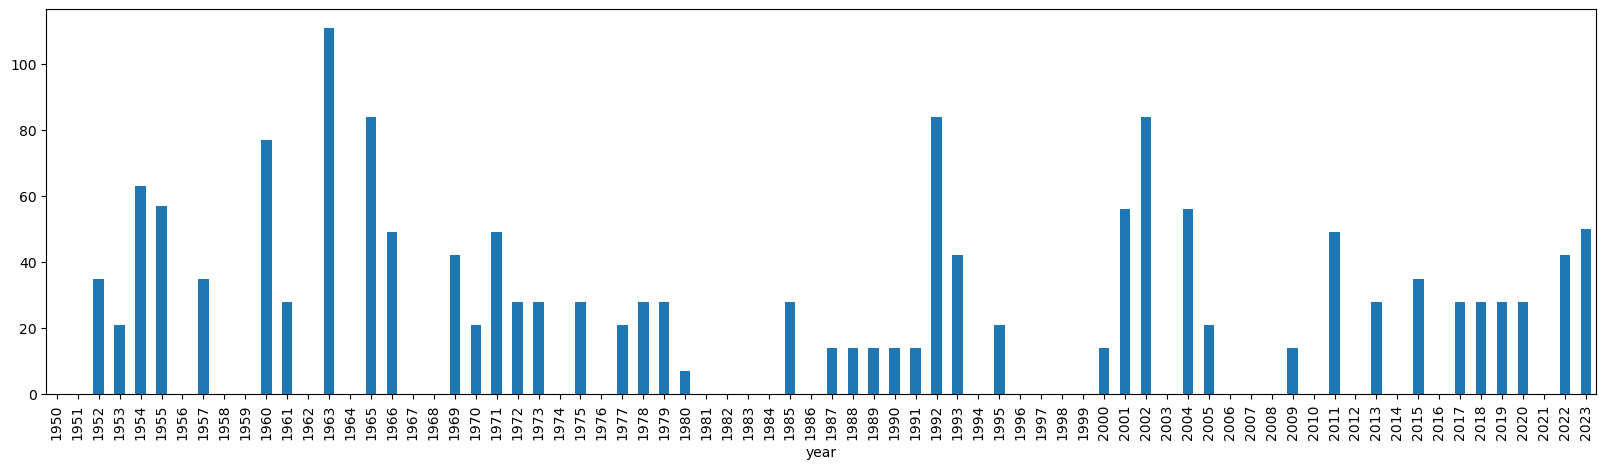

In [148]:
titles['days'].plot.bar(figsize=(20,5))

In [149]:
races_raw['date'] = pd.to_datetime(races_raw['date'])

In [150]:
races_raw['date']

0      2009-03-29
1      2009-04-05
2      2009-04-19
3      2009-04-26
4      2009-05-10
          ...    
1096   2023-10-22
1097   2023-10-29
1098   2023-11-05
1099   2023-11-19
1100   2023-11-26
Name: date, Length: 1101, dtype: datetime64[ns]

In [151]:
def howmanyleft(date1, date2):
    w2df = races_raw[(races_raw['date'] > pd.to_datetime(date1)) & (races_raw['date'] <= pd.to_datetime(date2))]
    return len(w2df['date'].drop_duplicates())

In [152]:
titles['racesLeft'] = titles.apply(lambda row: howmanyleft(row['decidingDate'], row['lastDate']), axis = 1)

In [153]:
races_total = pd.Series(results.groupby('year')['raceId'].nunique(), name='racesTotal')

In [154]:
titles = titles.reset_index(drop=True).merge(races_total, on='year')

In [155]:
titles['ratio'] = titles['racesLeft'] / titles['racesTotal']

In [156]:
titles.sort_values(by='ratio',ascending=False)

,champion,year,decidingDate,lastDate,gap,days,racesLeft,racesTotal,ratio
52,Michael Schumacher,2002,2002-07-21,2002-10-13,84 days,84,6,17,0.352941
42,Nigel Mansell,1992,1992-08-16,1992-11-08,84 days,84,5,16,0.312500
13,Jim Clark,1963,1963-09-08,1963-12-28,111 days,111,3,10,0.300000
15,Jim Clark,1965,1965-08-01,1965-10-24,84 days,84,3,10,0.300000
73,Max Verstappen,2023,2023-10-07,2023-11-26,50 days,50,6,22,0.272727
...,...,...,...,...,...,...,...,...,...
34,Niki Lauda,1984,1984-10-21,1984-10-21,0 days,0,0,16,0.000000
44,Michael Schumacher,1994,1994-11-13,1994-11-13,0 days,0,0,16,0.000000
36,Alain Prost,1986,1986-10-26,1986-10-26,0 days,0,0,16,0.000000
1,Juan Fangio,1951,1951-10-28,1951-10-28,0 days,0,0,8,0.000000


<Axes: >

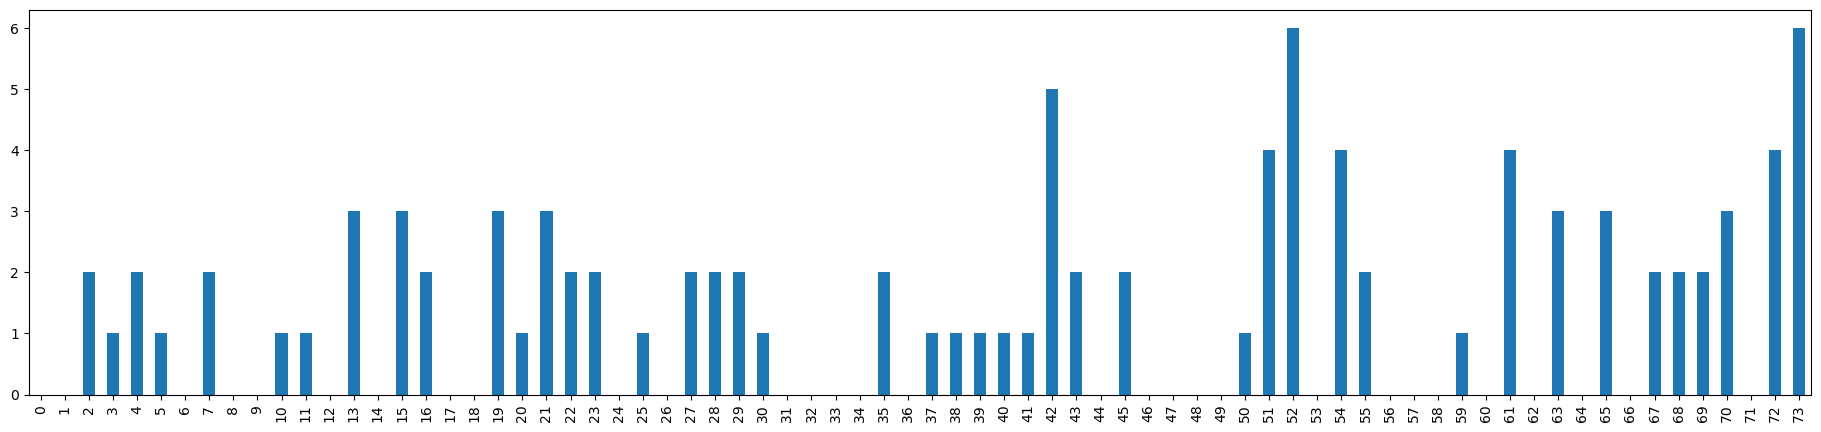

In [157]:
titles['racesLeft'].plot.bar(figsize=(23,5))

## Maiden wins, podiums and points

In [158]:
years = results['year'].sort_values().dropna().drop_duplicates().to_list()

<Axes: xlabel='year'>

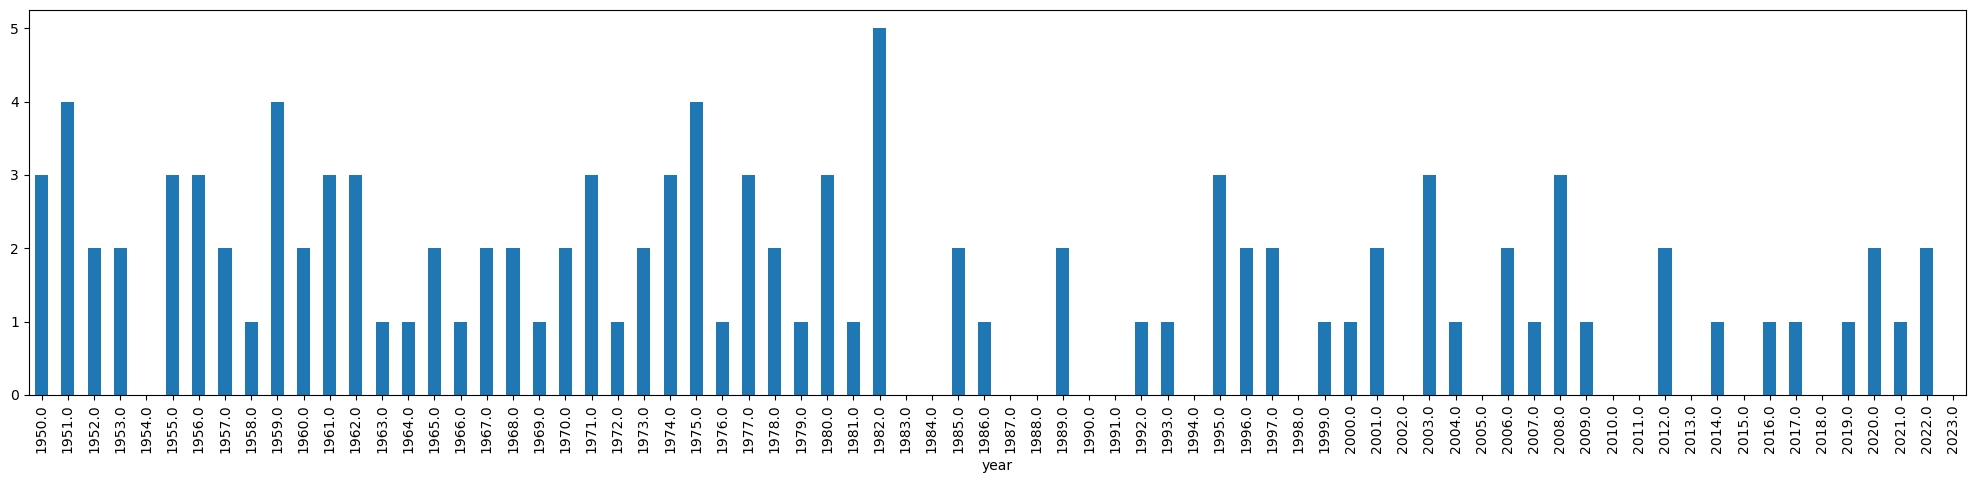

In [159]:
pd.DataFrame(results[results['position'] == 1].groupby('name')['year'].min()).groupby('year').size().reindex(index=years).plot.bar(figsize=(25,5))

In [160]:
results[results['position'] == 1].groupby('name')['year'].min().nlargest(10)

name
Carlos Sainz        2022.0
George Russell      2022.0
Esteban Ocon        2021.0
Pierre Gasly        2020.0
Sergio Pérez        2020.0
Charles Leclerc     2019.0
Valtteri Bottas     2017.0
Max Verstappen      2016.0
Daniel Ricciardo    2014.0
Nico Rosberg        2012.0
Name: year, dtype: float64

<Axes: xlabel='year'>

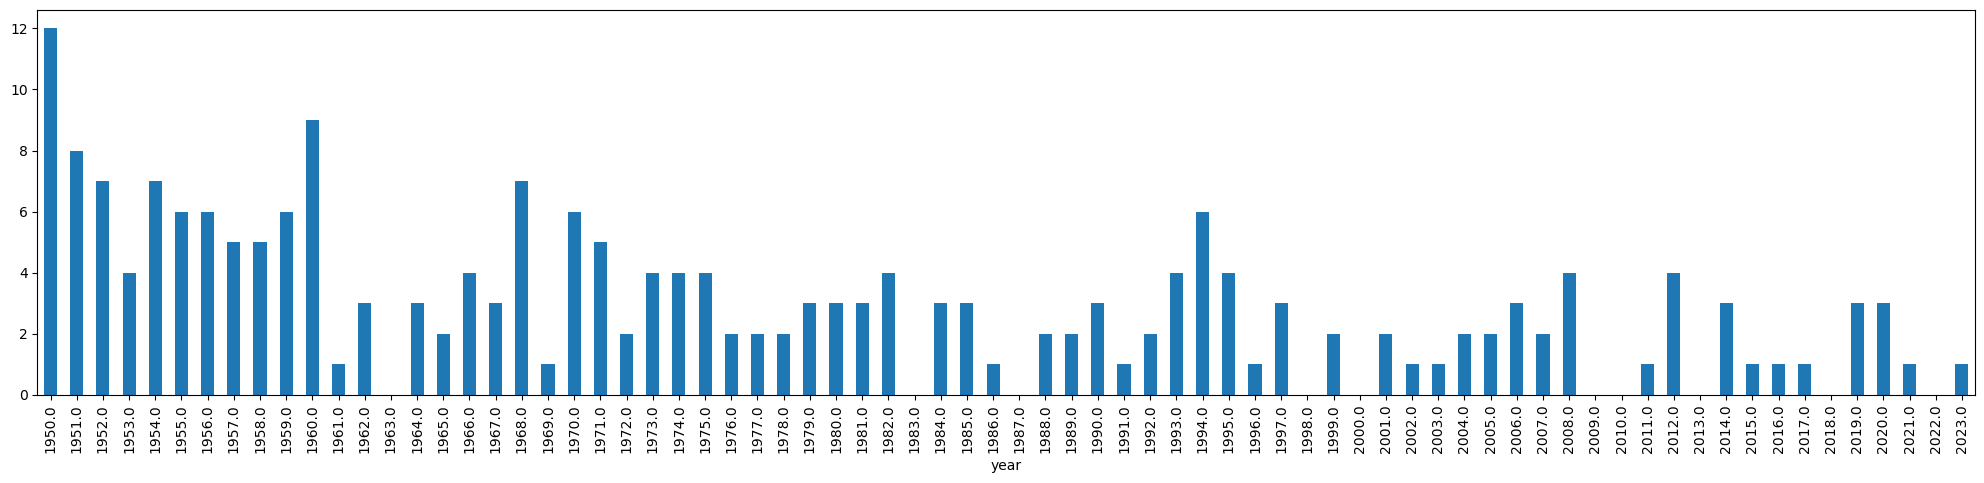

In [161]:
pd.DataFrame(results[results['position'] <= 3].groupby('name')['year'].min()).groupby('year').size().reindex(index=years).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

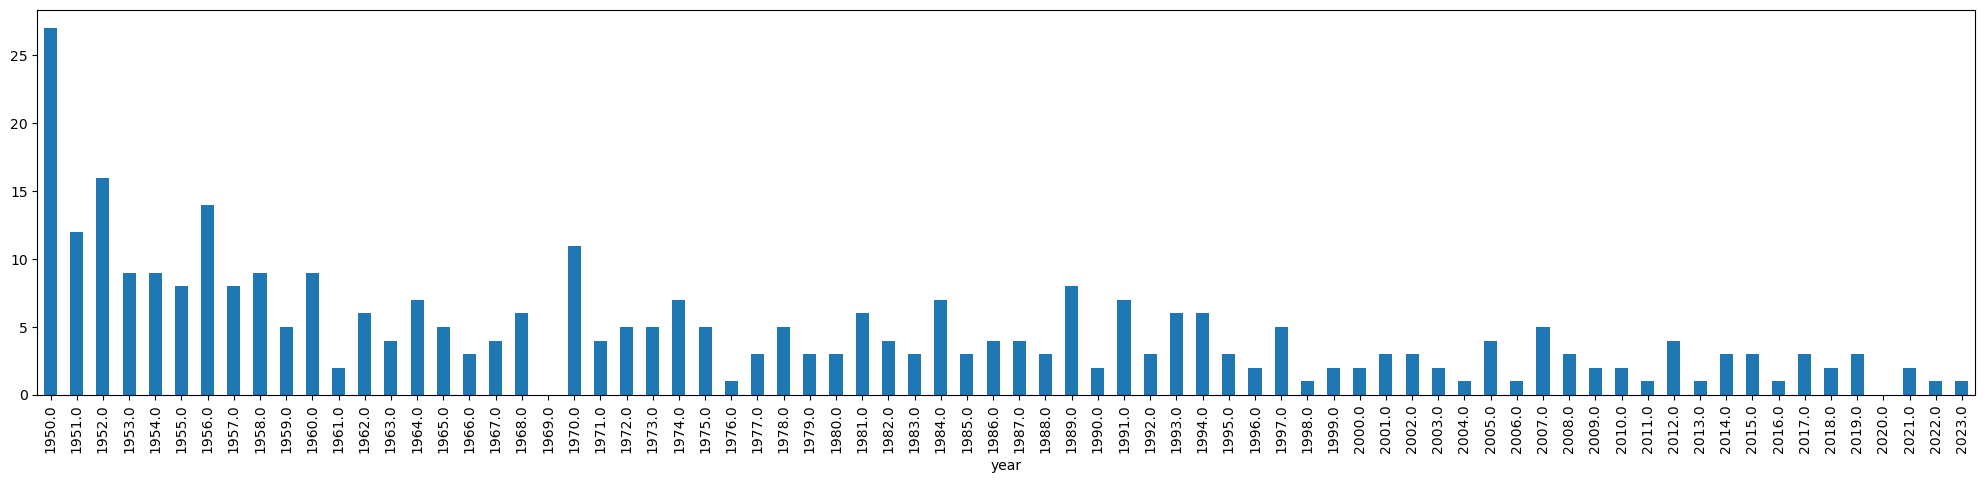

In [162]:
pd.DataFrame(results[results['position'] <= 6].groupby('name')['year'].min()).groupby('year').size().reindex(index=years).plot.bar(figsize=(25,5))

In [163]:
rank23(pd.DataFrame(results[results['position'] <= 6].groupby('name')['year'].min()).groupby('year').size().reindex(index=years))

'63 seasons larger than 2023, 2 seasons smaller than 2023, 8 seasons equal to 2023'

<Axes: xlabel='year'>

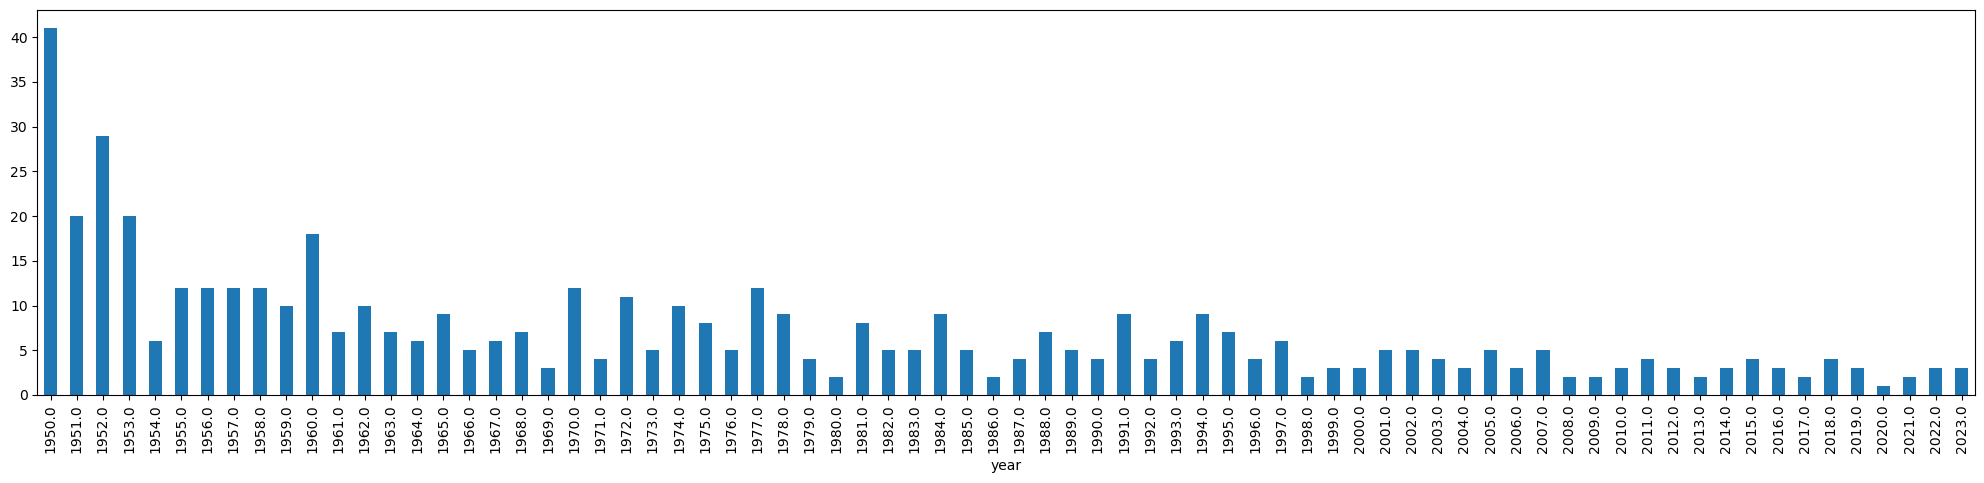

In [164]:
pd.DataFrame(results[results['position'] <= 10].groupby('name')['year'].min()).groupby('year').size().reindex(index=years).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

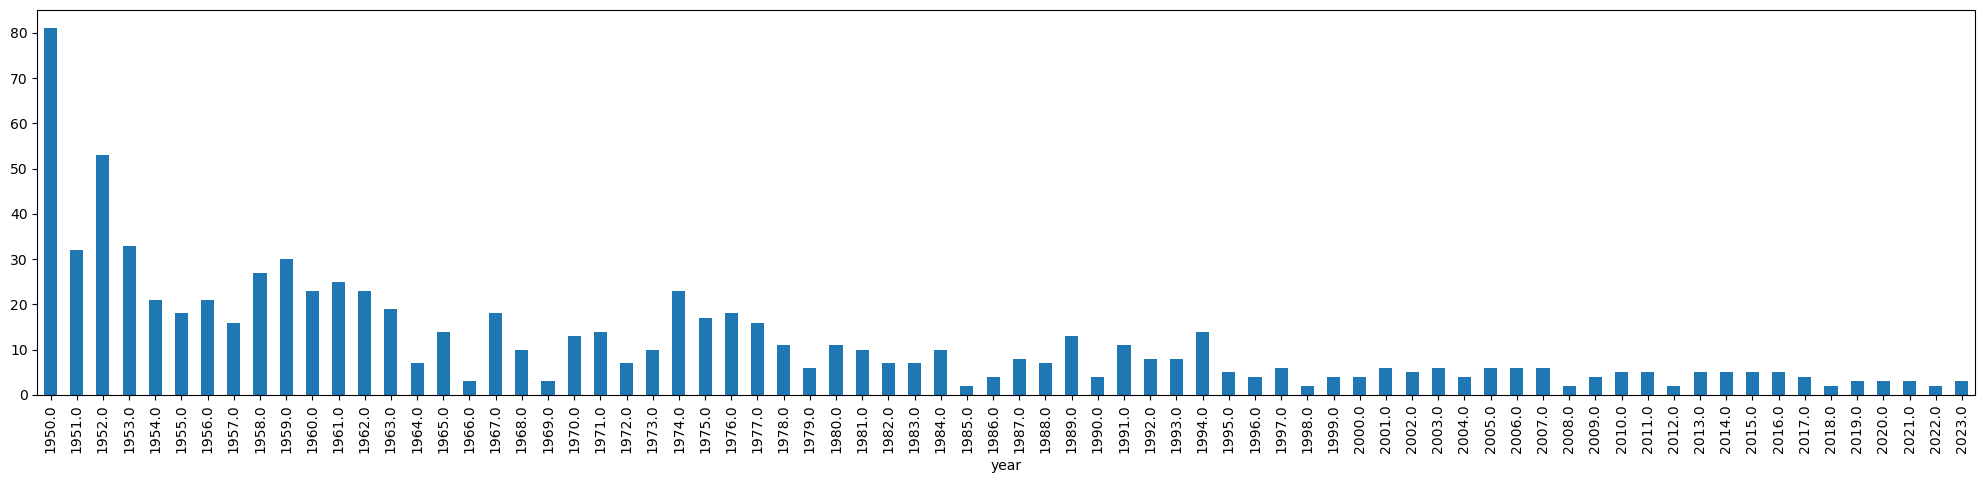

In [165]:
pd.DataFrame(results[results['points'] >= 0].groupby('name')['year'].min()).groupby('year').size().reindex(index=years).plot.bar(figsize=(25,5))

In [166]:
pd.DataFrame(results[results['points'] >= 0].groupby('name')['year'].min()).groupby('year').size().reindex(index=years)

year
1950.0    81
1951.0    32
1952.0    53
1953.0    33
1954.0    21
          ..
2019.0     3
2020.0     3
2021.0     3
2022.0     2
2023.0     3
Length: 74, dtype: int64

In [167]:
pd.DataFrame(results[results['points'] >= 0].groupby('name')['year'].min()).sort_values(by='year')

,year
name,
Lee Wallard,1950.0
Jimmy Davies,1950.0
Jim Rathmann,1950.0
Jerry Hoyt,1950.0
Bill Schindler,1950.0
...,...
Nyck de Vries,2022.0
Guanyu Zhou,2022.0
Logan Sargeant,2023.0


## Point differences

In [168]:
sprints = pd.read_json(os.path.join('data','ergast-sprints.json'))
results_w_sprints = pd.concat([results, sprints])

In [169]:
pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()

year
1950.0     30.00
1951.0     37.00
1952.0     53.50
1953.0     46.50
1954.0     57.14
           ...  
2019.0    413.00
2020.0    347.00
2021.0    395.50
2022.0    454.00
2023.0    575.00
Name: points, Length: 74, dtype: float64

In [170]:
pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[2])

year
1950.0     27.00
1951.0     27.00
1952.0     22.00
1953.0     29.50
1954.0     24.64
           ...  
2019.0    278.00
2020.0    214.00
2021.0    226.00
2022.0    305.00
2023.0    234.00
Name: points, Length: 74, dtype: float64

<Axes: xlabel='year'>

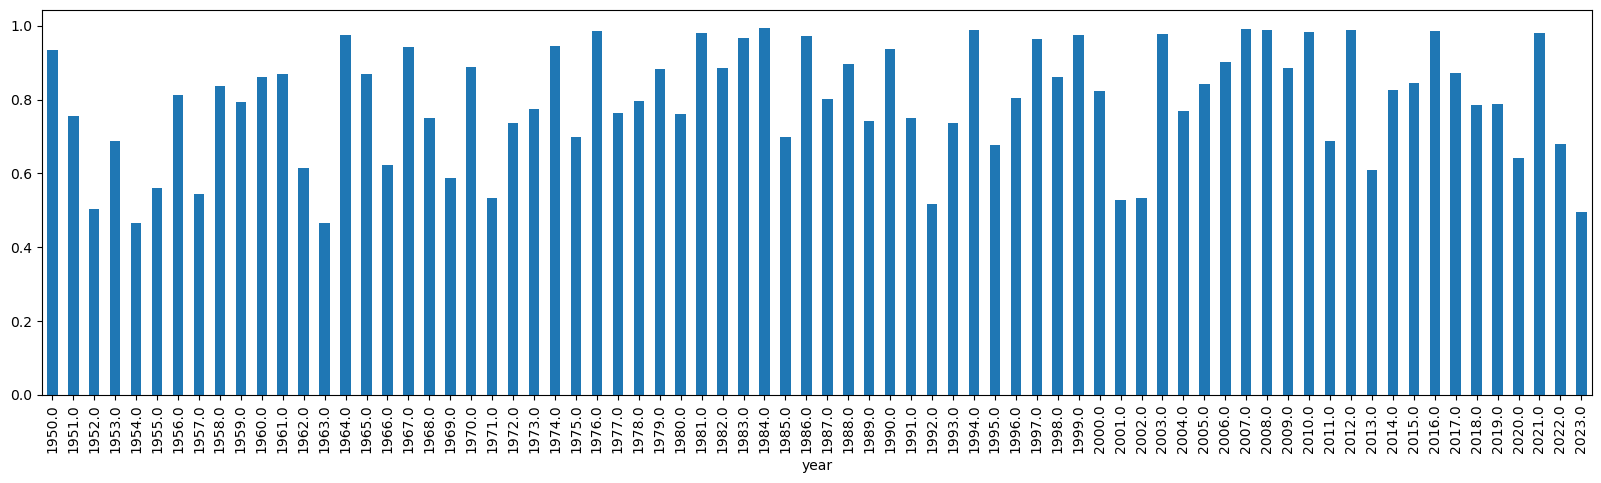

In [171]:
(pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()).plot.bar(figsize=(20,5))

In [172]:
graf1 = pd.Series((pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()), name="Bodový rozdíl mezi mistrem světa a vicemistrem")
graf1.index = graf1.index.astype(int)

In [173]:
graf(sloupcovy=[graf1], titulek="Takový náskok nepamatuje F1 od roku 1963", prvni=True, kredity=["Zdroj dat: Ergast F1 API | Vizualizace: Michal Kašpárek, iROZHLAS.cz","https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika"], target="prvni_druhy", procenta=[graf1], osaymax=100, barvy=["#fd7f6f"], podtitulek="Tehdy se ale do mistrovství světa počítalo jen šest nejlepších výsledků sezony – kdyby tomu tak nebylo, byl by náskok Jima Clarka na Grahama Hilla ještě větší.")

Graf uložen.


In [174]:
(pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()).nsmallest()

year
1963.0    0.465753
1954.0    0.466223
2023.0    0.495652
1952.0    0.504673
1992.0    0.518519
Name: points, dtype: float64

In [175]:
rank23((pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()))

'71 seasons larger than 2023, 2 seasons smaller than 2023, 0 seasons equal to 2023'

<Axes: xlabel='year'>

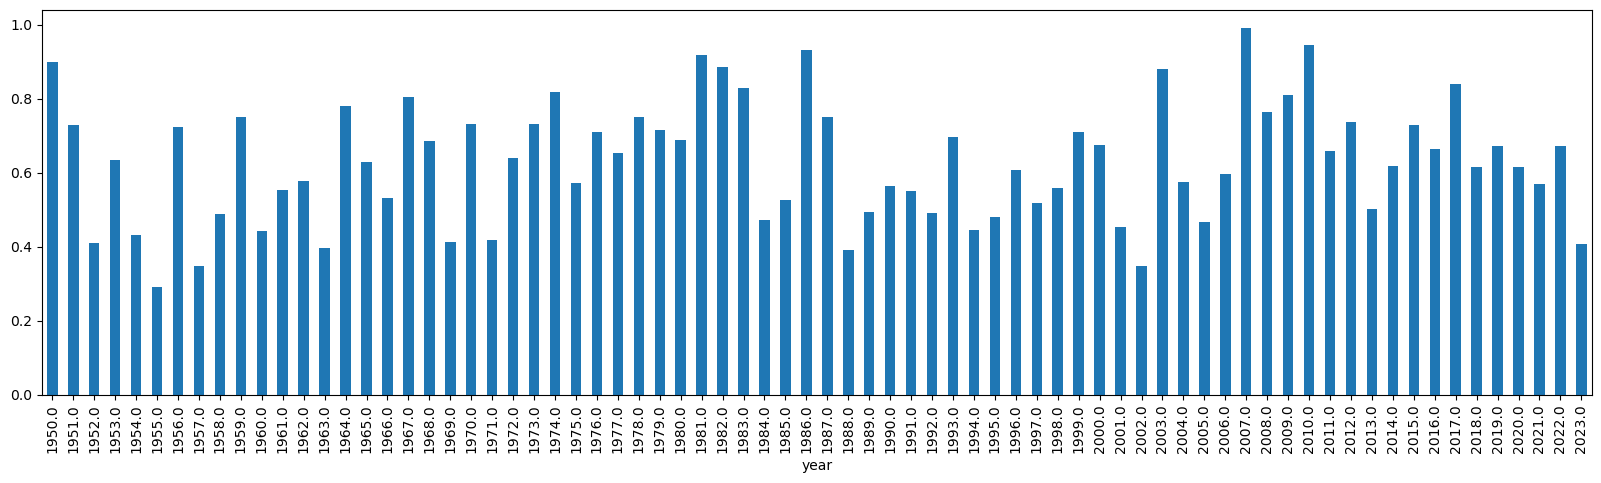

In [176]:
(pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[2]) / pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()).plot.bar(figsize=(20,5))

In [177]:
rank23((pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[2]) / pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()))

'68 seasons larger than 2023, 5 seasons smaller than 2023, 0 seasons equal to 2023'

In [178]:
(pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[2]) / pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()).nlargest()

year
2007.0    0.990909
2010.0    0.945312
1986.0    0.932432
1981.0    0.920000
1950.0    0.900000
Name: points, dtype: float64

<Axes: xlabel='year'>

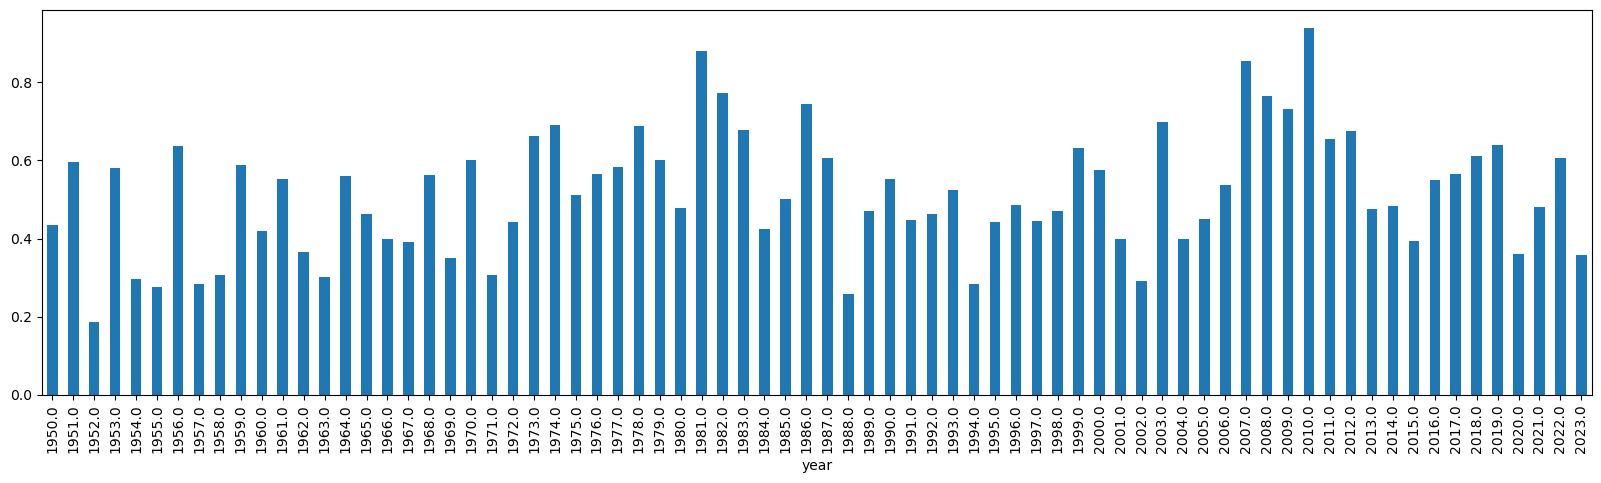

In [179]:
(pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest().iloc[3]) / pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()).plot.bar(figsize=(20,5))

<Axes: xlabel='year'>

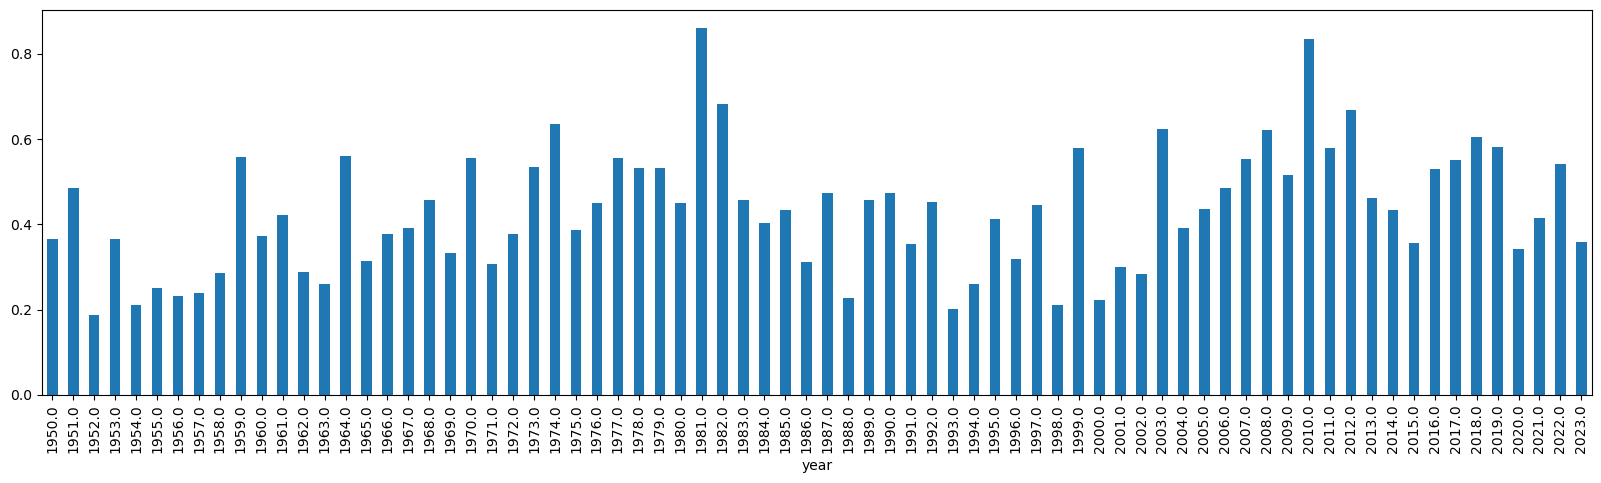

In [180]:
(pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest().iloc[4]) / pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()).plot.bar(figsize=(20,5))

<Axes: xlabel='year'>

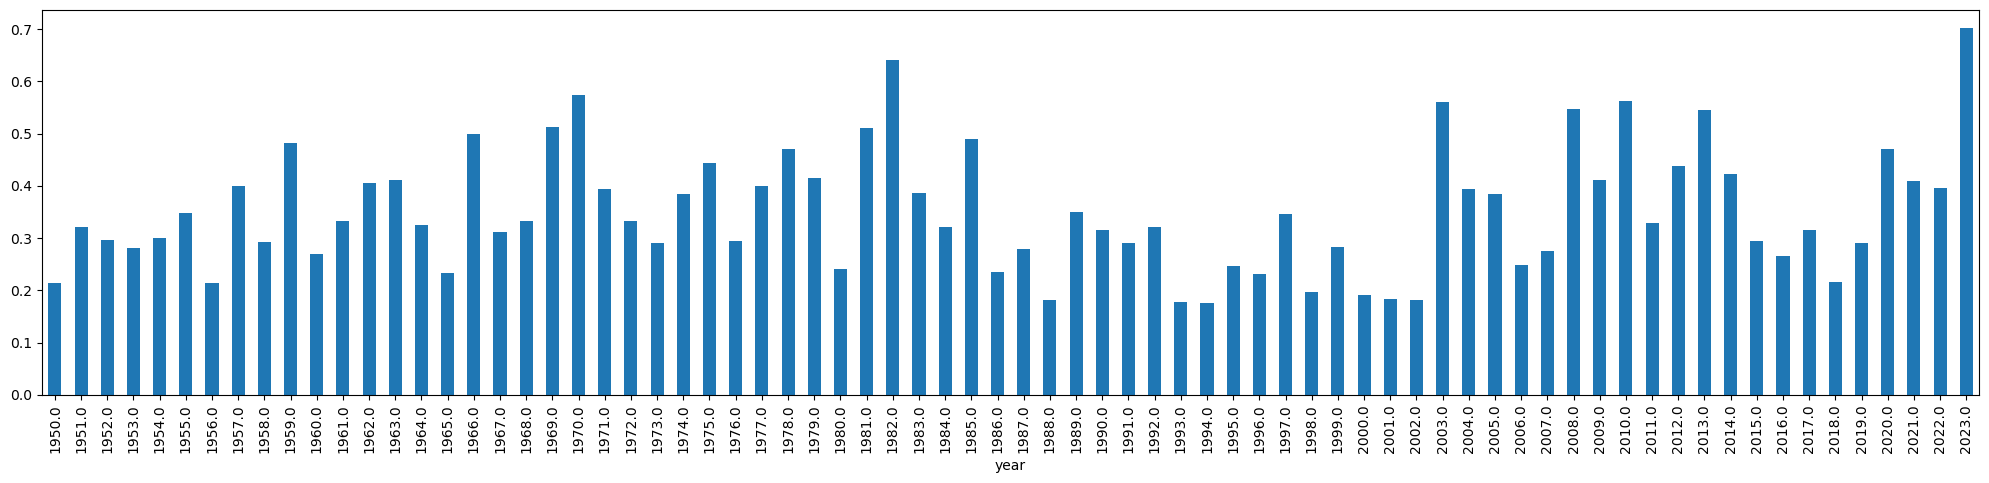

In [181]:
(pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(10).iloc[6]) / pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(10).iloc[1])).plot.bar(figsize=(25,5))

In [182]:
graf3 = pd.Series(pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(10).iloc[6]) / pd.DataFrame(results_w_sprints.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(10).iloc[1]), name='Bodový rozdíl mezi 2. a 7. jezdcem v pořadí šampionátu')
graf3.index = graf3.index.astype(int)

In [183]:
graf3

year
1950    0.214286
1951    0.321429
1952    0.296296
1953    0.281250
1954    0.300300
          ...   
2019    0.291411
2020    0.470852
2021    0.410323
2022    0.396104
2023    0.701754
Name: Bodový rozdíl mezi 2. a 7. jezdcem v pořadí šampionátu, Length: 74, dtype: float64

In [184]:
graf(sloupcovy=[graf3], titulek="Nebýt Verstappena, bylo by to mimořádně vyrovnané", prvni=True, kredity=["Zdroj dat: Ergast F1 API | Vizualizace: Michal Kašpárek, iROZHLAS.cz","https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika"], target="nebyt_verstappena", procenta=[graf3], barvy=["#fd7f6f"], podtitulek="Za mistrem světa jezdili natěsno jezdci Ferrari, Mercedesu, Alpine i McLarenu.")

Graf uložen.


In [185]:
pd.DataFrame((pd.DataFrame(results_w_sprints.groupby(['year','constructor','name'])['points'].sum())).sort_values(by=['year','points'], ascending=[True, False]).groupby(['year','constructor'])['points'].max()).sort_values(by=['year','points'], ascending=[True,False]).tail(20)

points
year   constructor           
2022.0 Red Bull         454.0
       Ferrari          308.0
       Mercedes         275.0
       McLaren          122.0
       Alpine F1 Team    92.0
       Alfa Romeo        49.0
       Aston Martin      37.0
       Haas F1 Team      25.0
       AlphaTauri        23.0
       Williams           4.0
2023.0 Red Bull         575.0
       Mercedes         234.0
       Aston Martin     206.0
       Ferrari          206.0
       McLaren          205.0
       Alpine F1 Team    62.0
       Williams          27.0
       AlphaTauri        17.0
       Alfa Romeo        10.0
       Haas F1 Team       9.0

In [186]:
constructorChamps = pd.DataFrame((pd.DataFrame(results_w_sprints.groupby(['year','constructor','name'])['points'].sum())).sort_values(by=['year','points'], ascending=[True, False]).groupby(['year','constructor'])['points'].max()).reset_index()

In [187]:
constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[0])

year
1950.0     30.00
1951.0     37.00
1952.0     53.50
1953.0     46.50
1954.0     40.14
           ...  
2019.0    413.00
2020.0    347.00
2021.0    395.50
2022.0    454.00
2023.0    575.00
Name: points, Length: 74, dtype: float64

In [188]:
constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1])

year
1950.0     13.00
1951.0     28.00
1952.0     10.00
1953.0     29.50
1954.0     26.64
           ...  
2019.0    278.00
2020.0    214.00
2021.0    387.50
2022.0    308.00
2023.0    234.00
Name: points, Length: 74, dtype: float64

<Axes: xlabel='year'>

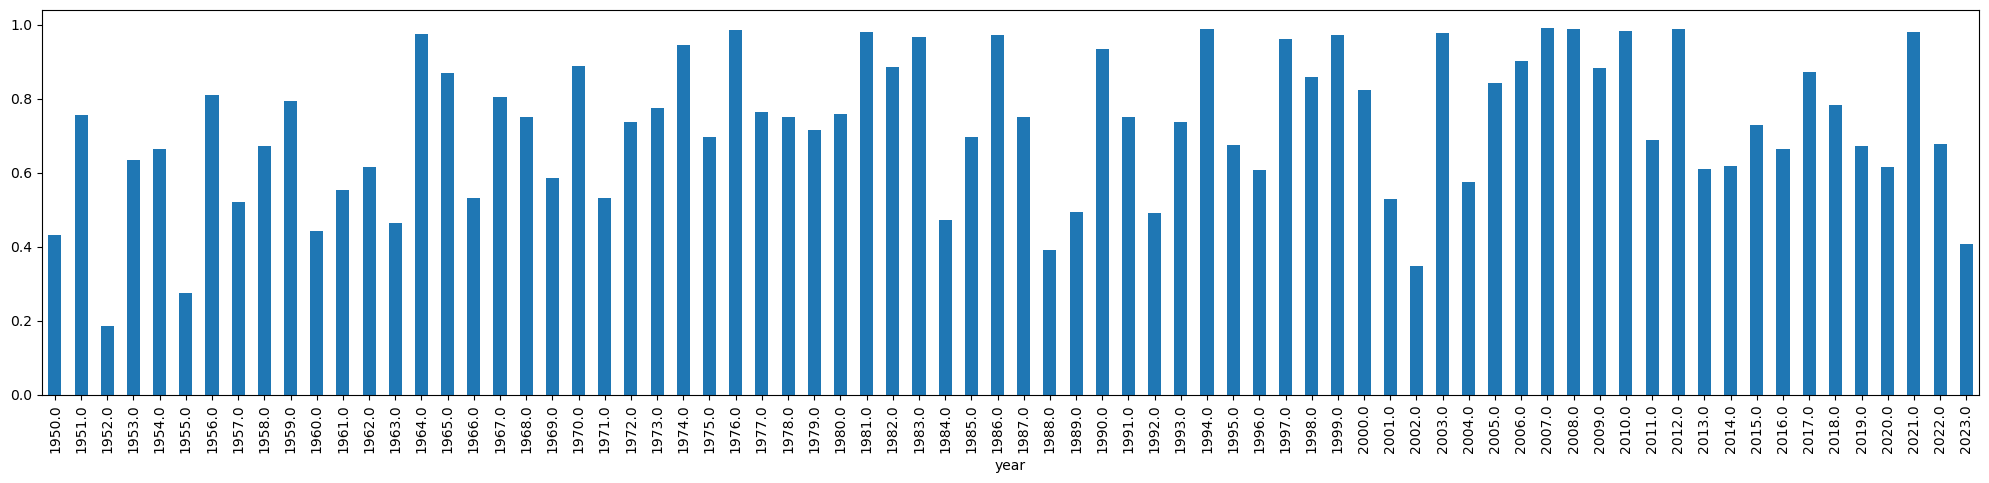

In [189]:
(constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[0])).plot.bar(figsize=(25,5))

In [190]:
newey = [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2010, 2011, 2012, 2013, 2021, 2022, 2023]

In [191]:
constructorChamps2 = constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[0])

In [192]:
constructorChamps2[constructorChamps2.index.isin(newey)].mean()

0.7757199531960323

In [193]:
(constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[0])).mean()

0.7250972466467102

In [194]:
(constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[0])).nsmallest(20)

year
1952.0    0.186916
1955.0    0.276341
2002.0    0.347222
1988.0    0.390476
2023.0    0.406957
1950.0    0.433333
1960.0    0.441860
1963.0    0.465753
1984.0    0.472222
1992.0    0.490741
1989.0    0.493827
1957.0    0.521739
2001.0    0.528455
1971.0    0.532258
1966.0    0.533333
1961.0    0.552632
2004.0    0.574324
1969.0    0.587302
1996.0    0.608247
2013.0    0.609572
Name: points, dtype: float64

In [195]:
(constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[0])).nlargest(10)

year
2007.0    0.990909
2008.0    0.989796
2012.0    0.989324
1994.0    0.989130
1976.0    0.985507
2010.0    0.984375
1981.0    0.980000
2021.0    0.979772
2003.0    0.978495
1964.0    0.975610
Name: points, dtype: float64

## Teams on podiums

<Axes: xlabel='year'>

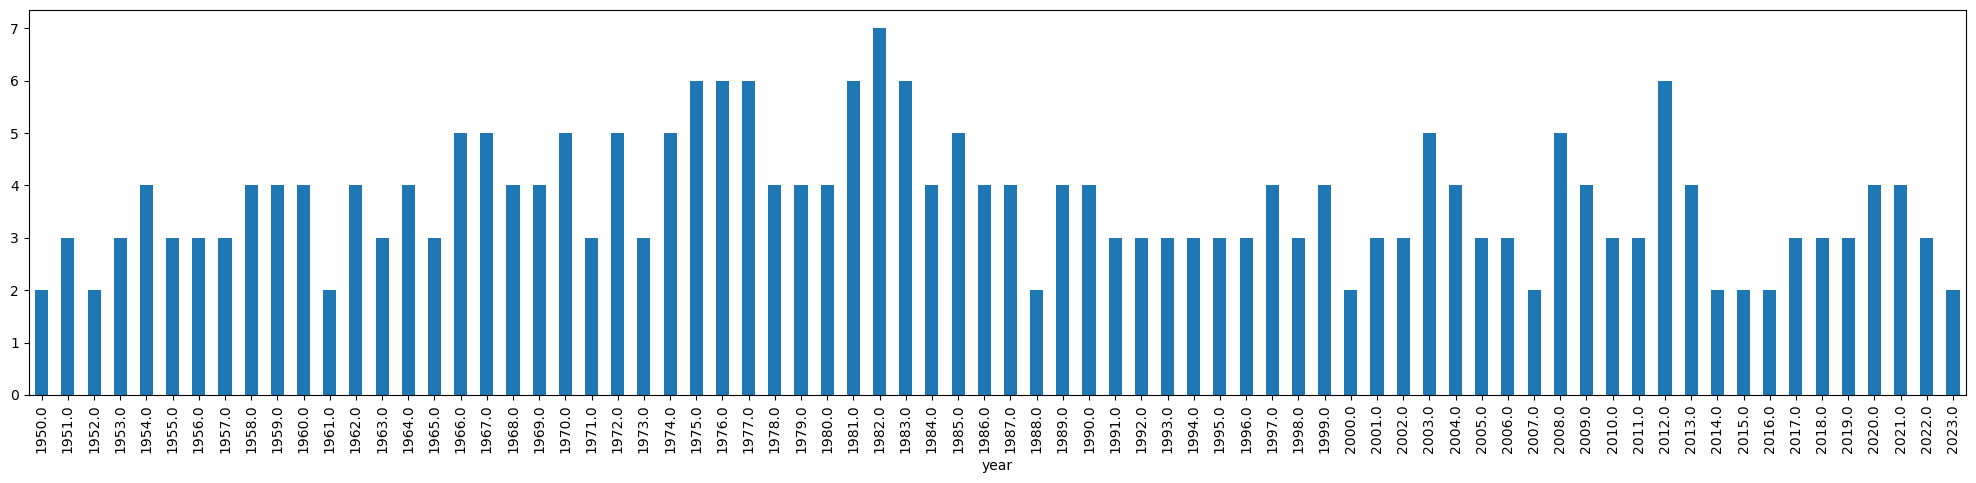

In [196]:
results[results['position'] == 1].groupby('year')['constructor'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

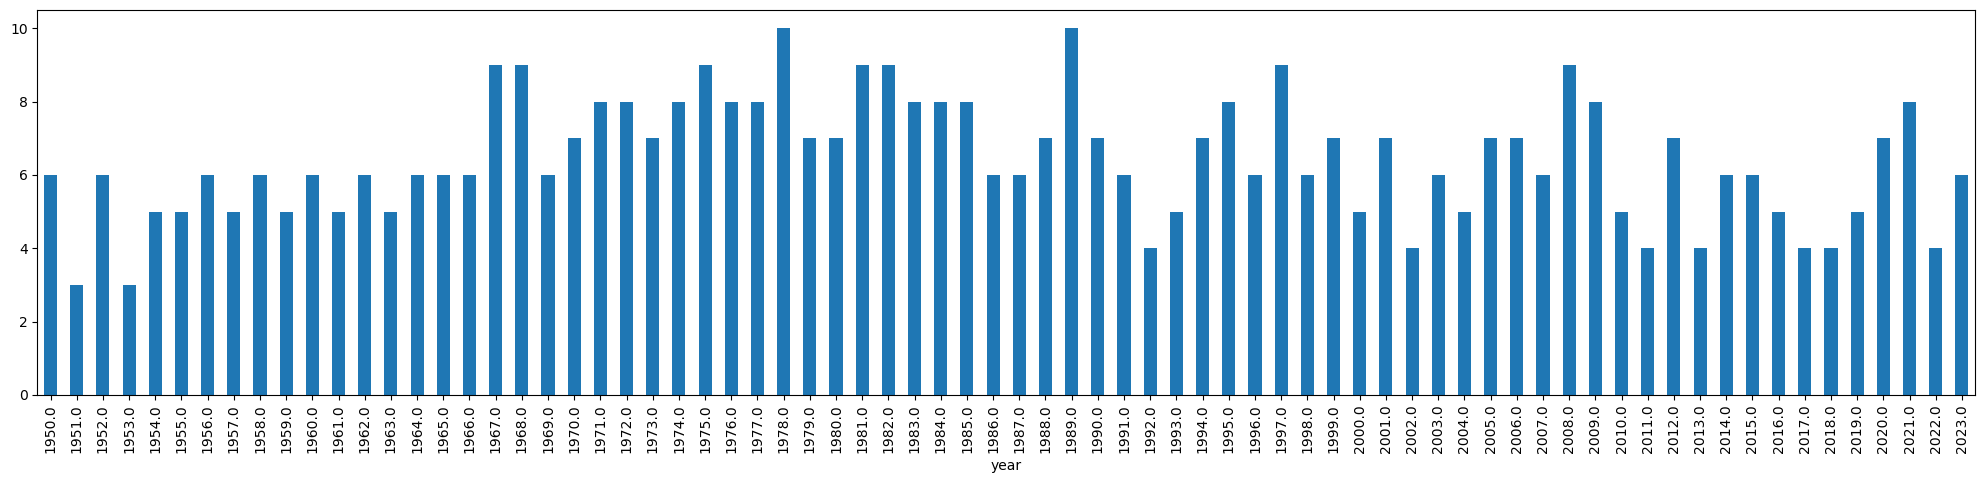

In [197]:
results[results['position'] <= 3].groupby('year')['constructor'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

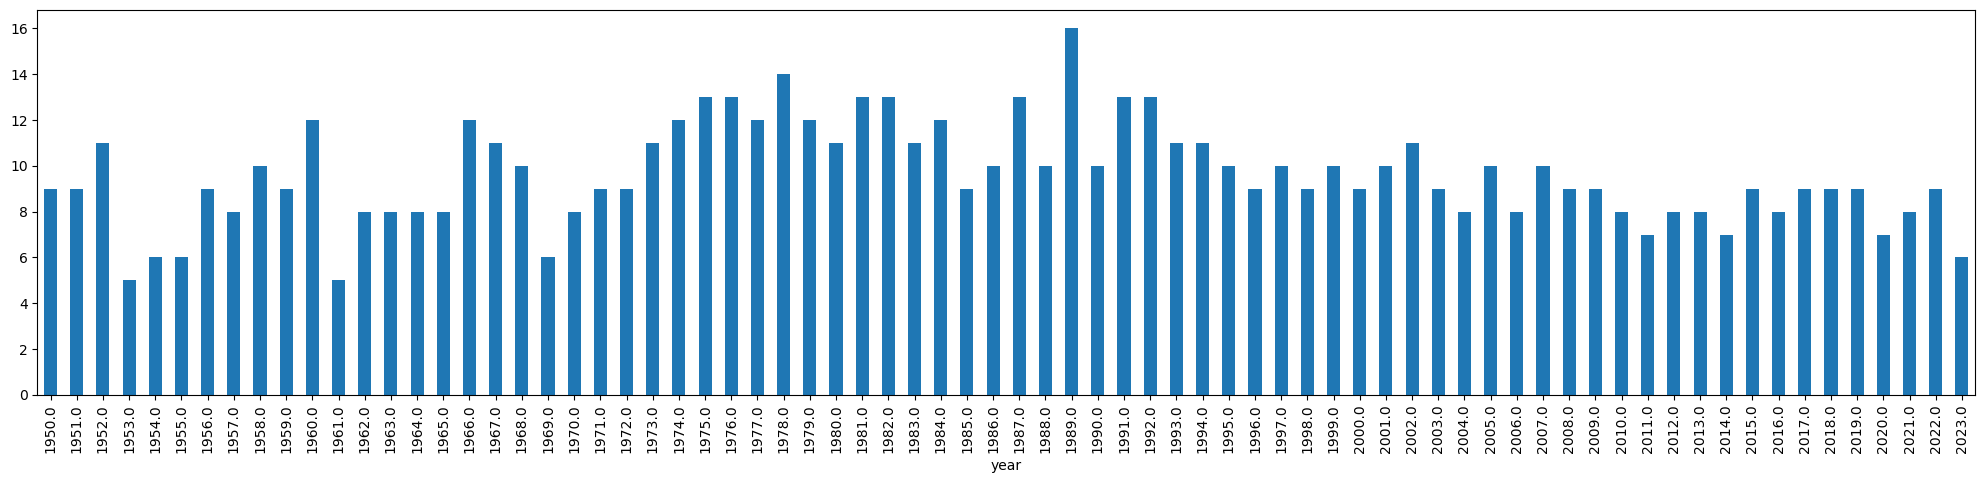

In [198]:
results[results['position'] <= 6].groupby('year')['constructor'].nunique().plot.bar(figsize=(25,5))

In [199]:
rank23(results[results['position'] <= 6].groupby('year')['constructor'].nunique())

'68 seasons larger than 2023, 2 seasons smaller than 2023, 3 seasons equal to 2023'

In [200]:
results[results['position'] <= 6].groupby('year')['constructor'].nunique().nsmallest(10)

year
1953.0    5
1961.0    5
1954.0    6
1955.0    6
1969.0    6
2023.0    6
2011.0    7
2014.0    7
2020.0    7
1957.0    8
Name: constructor, dtype: int64

<Axes: xlabel='year'>

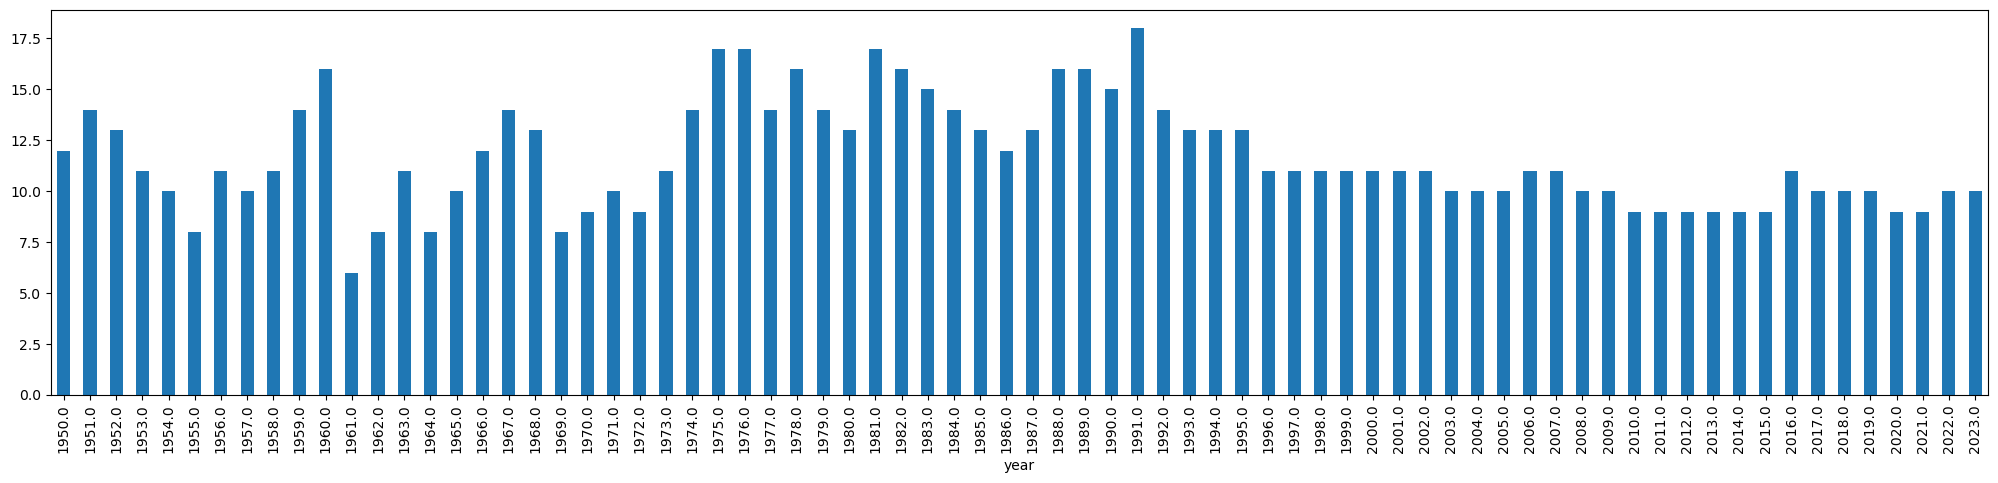

In [201]:
results[results['position'] <= 10].groupby('year')['constructor'].nunique().plot.bar(figsize=(25,5))

## Outstanding rookies

In [202]:
wpoints = {}
for y in range(1950, 2024):
    if y <= 1960:
        wpoints[y] = 8
    if y >= 1961 and y <= 1990:
        wpoints[y] = 9
    if y >= 1991 and y <= 2009:
        wpoints[y] = 10
    if y >= 2010:
        wpoints[y] = 25

In [203]:
winningpoints = pd.DataFrame([wpoints]).transpose().rename(columns={0:'wpoints'})
winningpoints['year'] = winningpoints.index
winningpoints = winningpoints.reset_index(drop=True)

In [204]:
racesperseason = pd.DataFrame(results.groupby('year')['raceId'].nunique())

In [205]:
racesperseason['year'] = racesperseason.index.astype(int)
racesperseason = racesperseason.reset_index(drop=True)

In [206]:
racesperseason = racesperseason.merge(winningpoints, on='year')

In [207]:
racesperseason

,raceId,year,wpoints
0,7,1950,8
1,8,1951,8
2,8,1952,8
3,9,1953,8
4,9,1954,8
...,...,...,...
69,21,2019,25
70,17,2020,25
71,22,2021,25
72,22,2022,25


In [208]:
racesperseason['possiblePoints'] = racesperseason['raceId'] * racesperseason['wpoints']

In [209]:
racesperseason

,raceId,year,wpoints,possiblePoints
0,7,1950,8,56
1,8,1951,8,64
2,8,1952,8,64
3,9,1953,8,72
4,9,1954,8,72
...,...,...,...,...
69,21,2019,25,525
70,17,2020,25,425
71,22,2021,25,550
72,22,2022,25,550


In [210]:
rookies = pd.DataFrame(results.groupby('name')['year'].min())
rookies['name'] = rookies.index
rookies = rookies.reset_index(drop = True)

In [211]:
rookies

,year,name
0,1952.0,Adolf Brudes
1,1953.0,Adolfo Cruz
2,2007.0,Adrian Sutil
3,1987.0,Adrián Campos
4,1988.0,Aguri Suzuki
...,...,...
853,2003.0,Zsolt Baumgartner
854,1952.0,Élie Bayol
855,1989.0,Éric Bernard
856,1991.0,Érik Comas


In [212]:
def points(year, name):
    return results[(results['year'] == year) & (results['name'] == name)]['points'].sum()

In [213]:
rookies = rookies.merge(racesperseason[['year','possiblePoints']], on='year')

In [214]:
rookies['pointsWon'] = rookies.apply(lambda row: points(row['year'], row['name']), axis = 1)

In [215]:
rookies['ratio'] = rookies['pointsWon'] / rookies['possiblePoints']

<Axes: xlabel='year'>

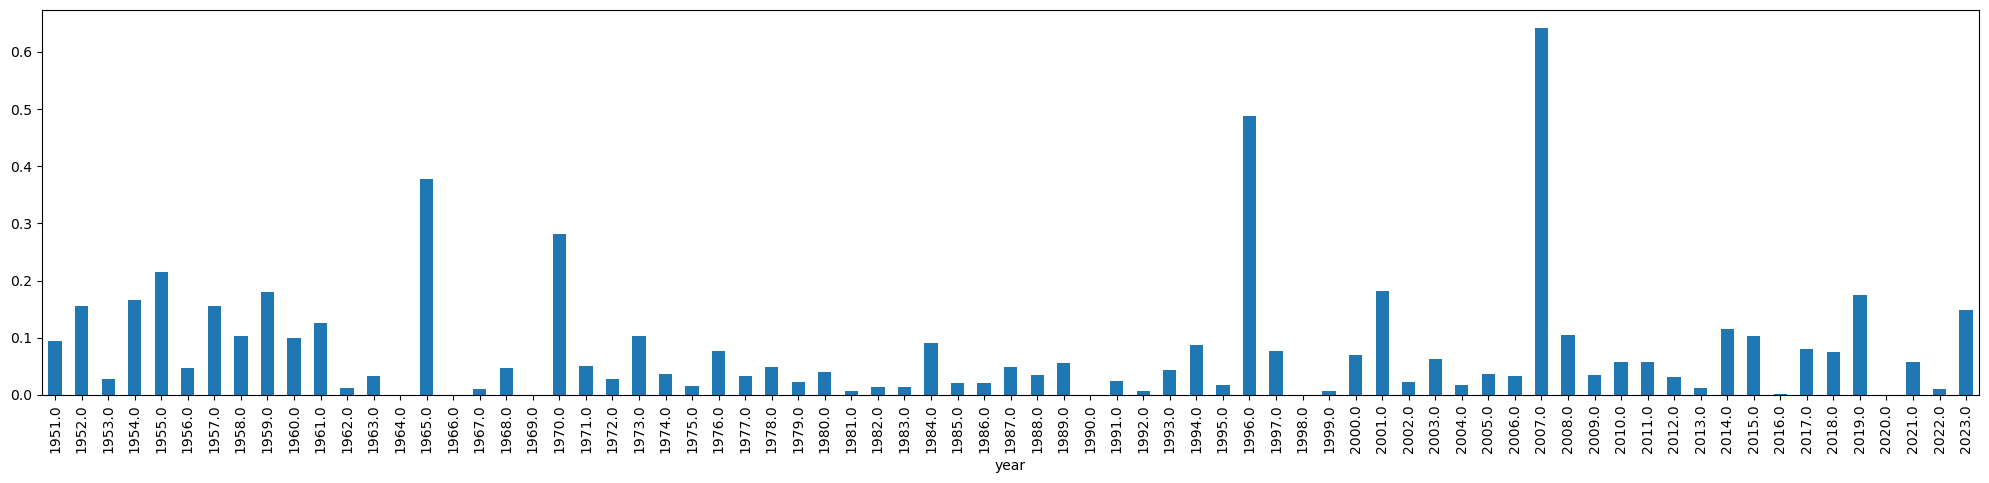

In [216]:
rookies[rookies['year'] > 1950].groupby('year')['ratio'].max().plot.bar(figsize=(25,5))

In [217]:
rank23(rookies[rookies['year'] > 1950].groupby('year')['ratio'].max())

'11 seasons larger than 2023, 61 seasons smaller than 2023, 0 seasons equal to 2023'

In [218]:
rookies.sort_values(by='ratio',ascending=False).head(30).reset_index()

,index,year,name,possiblePoints,pointsWon,ratio
0,89,2007.0,Lewis Hamilton,170,109.0,0.641176
1,299,1950.0,Nino Farina,56,30.0,0.535714
2,292,1950.0,Luigi Fagioli,56,28.0,0.500000
3,822,1996.0,Jacques Villeneuve,160,78.0,0.487500
4,287,1950.0,Juan Fangio,56,27.0,0.482143
5,211,1965.0,Jackie Stewart,90,34.0,0.377778
6,439,1970.0,Clay Regazzoni,117,33.0,0.282051
7,291,1950.0,Louis Rosier,56,13.0,0.232143
8,113,1955.0,Eugenio Castellotti,56,12.0,0.214286
9,242,1950.0,Alberto Ascari,56,11.0,0.196429


In [219]:
rookies[rookies['year'] > 1950][['year','name','ratio']].sort_values(by='ratio',ascending=False).head(50).reset_index()

,index,year,name,ratio
0,89,2007.0,Lewis Hamilton,0.641176
1,822,1996.0,Jacques Villeneuve,0.487500
2,211,1965.0,Jackie Stewart,0.377778
3,439,1970.0,Clay Regazzoni,0.282051
4,113,1955.0,Eugenio Castellotti,0.214286
5,454,2001.0,Juan Pablo Montoya,0.182353
6,162,1959.0,Dan Gurney,0.180556
7,87,2007.0,Heikki Kovalainen,0.176471
8,457,2019.0,Alexander Albon,0.175238
9,673,1954.0,Karl Kling,0.166667


## Verstappen's wins from far back

In [220]:
results[(results['grid'] > 6) & (results['position'] == 1)][['year','round','gp','name','grid']].sort_values(by=['year','round']).tail(20)

,year,round,gp,name,grid
6051,2003.0,3.0,Brazilian Grand Prix,Giancarlo Fisichella,8.0
6241,2003.0,15.0,United States Grand Prix,Michael Schumacher,7.0
5895,2004.0,14.0,Belgian Grand Prix,Kimi Räikkönen,10.0
5695,2005.0,8.0,Canadian Grand Prix,Kimi Räikkönen,7.0
7227,2005.0,18.0,Japanese Grand Prix,Kimi Räikkönen,17.0
5441,2006.0,13.0,Hungarian Grand Prix,Jenson Button,14.0
294,2008.0,15.0,Singapore Grand Prix,Fernando Alonso,15.0
1578,2011.0,7.0,Canadian Grand Prix,Jenson Button,7.0
1918,2012.0,2.0,Malaysian Grand Prix,Fernando Alonso,8.0
2062,2012.0,8.0,European Grand Prix,Fernando Alonso,11.0
